<div style='text-align: right'>Author: <b>Mohsen Daniel Samiei</b></div>

<font size='5'>Machine Learning Project:</font> 

-----

<div style='text-align: center'><font size='10'><b>Different Strokes for Different Folks</b></font></div>

<div style='text-align: center'><font size='6'>- Stroke Prediction -</font></div>

-----

# Introduction

This project is a Machine Learning project that aims to use the dataset from the 'stroke.csv' file to train a Machine Learning model that predicts whether a person has had a stroke or not based on other variables, such as physical attributes (such as age, average glucose level, etc.), life choices (such as work type, smoking status, etc.), and health conditions (such as hypertension and heart disease).

<b>→ Problem type:</b> Therefore the Machine Learning problem that will be tackled in this project is a binary classification problem, since we will want to classify every person as either having had a stroke or not.

<b>→ Target variable:</b> In other words, our target variable, i.e. the variable that we are trying to predict, for this project will be the 'stroke' status, represented in the dataset as a boolean.

<b>→ Feature variables:</b> As already hinted at, the feature variables for this project will be the remaining columns in the dataset, which will be carefully analysed in the course of this project, and are:

- Gender
- Work type
- Residence type
- Smoking status
- "Ever married" status
- Hypertension status
- Heart disease status
- Age
- Average glucose level
- Body mass index



-----

# Table of Contents
<pre>1. Data Wrangling
    1.1. Import Libraries
    1.2. Import Data
    
2. Exploratory Data Analysis
    2.1. Data Exploration
    2.2. Feature Analysis
    
3. Data Analysis
    3.1. Control Variable
    3.2. Hypothesis Testing
    
4. Pre-processing
    4.1. Data Cleaning
    4.2. Missing Data
    4.3. Drop Columns
    4.4. Feature Encoding
    
5. Machine Learning
    5.1. Dataset Splitting
    5.2. Model Training
    5.3. Over-sampling
    5.4. Model Evaluation</pre>

------

# 1. Data Wrangling

In general, the first step of any Machine Learning project would be 'Data Collection', but in this case, the data had already been provided in the form of a csv file, which means that the actual first step of this Machine Learning project will be 'Data Wrangling'.

<b>Objective:</b> 'Data Wrangling' of course refers to the transformation of raw data into analyzable data, i.e. the main objective of this section will be to load the data from the csv file into Jupyter Notebook.

<b>Methodology:</b> For the purpose of this Machine Learning project, we will simply take advantage of the built-in 'read_csv' pandas function in order to convert our csv file into a pandas dataframe, which will allow for convenient data transformation and analysis in the subsequent sections.

## 1.1. Import Libraries

Here we will simply be importing the necessary python libraries, organized by their purpose.

In addition, we will also be importing custom built functions from the 'customPlots.py' file, which will allow us to plot custom charts.

In [1]:
# Data transformation
import numpy as np
import pandas as pd

# Statistics
import statsmodels.api as sm
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px
import seaborn as sns
from customPlots import pieChart
from customPlots import percentLine
from customPlots import histogram
from customPlots import barChartByStroke
from customPlots import pScatterPlot

In [2]:
# Assign color palette
mako = sns.color_palette('mako_r')

## 1.2. Import Data

Here we will simply be importing the data into our Jupyter Notebook.

In [3]:
path = 'C:/Users/mohse_pxtih2i/Documents/DSTI/Machine Learning/Project/datasets/stroke.csv'
df = pd.read_csv(path, sep=',', on_bad_lines='warn')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Save the raw state of the dataframe
raw_df = df.copy()

# 2. Exploratory Data Analysis

After succesfully importing our libraries and data, we are now on to the next step, the "Exploratory Data Analysis" section.

<b>Objective:</b> The primary focus of this section will be the preliminary exploration and analysis of our dataset, in order to gather insights into our data, as well as determine which of our feature variables have a statistically significant effect on our target variable, i.e. the stroke status.

<b>Methodology:</b> The actual exploratory data analysis will consist in:
- For categorical data:

    - Observing the distribution of each feature variable
    - Inspecting the difference between the stroke means of each of the categories within the feature variables
    - Conducting hypothesis tests to determine whether the stroke status is dependent on any of the feature variables
    
<b>
</b>

- For quantitative data:

    - Getting the correlation between the feature variables and the stroke status
    - Observing the distribution of each feature variable
    - Finding outliers

## 2.1. Data Exploration

Here we will simply be taking a closer look at our dataset to gather some insights and check if everything is in order.

### 2.1.1. Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


→ <b>From the table above, we can see that in our dataset we have:</b>
- <b>12 columns</b> (1 id column, 1 target variable column, and 10 feature variable columns)
- <b>5110 rows</b> (of which only the 'bmi' column contains null values)
- <b>3 different data types</b> (3× float64 , 4× int64, 5× object)


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


→ <b>Here we can take a closer look at our numerical data, which allows us to see that:</b>
- The 'age' column ranges from ~0 to 82, and appears to be relatively balanced.
- Considering the difference between their upper quartile and their max value, the 'avg_glucose_level' and 'bmi' columns appear to potentially have some outliers.
- The 'hypertension', 'heart_disease', and 'stroke' columns are binary.
- Considering their means, the data for all three binary columns appear to be very unbalanced, having significantly more negatives than positives.

### 2.1.2. Data Checking

Here we will simply be checking if the data contains null values or duplicate entries.

#### 2.1.2.1. Null Values

In [7]:
# Create lists to keep track of columns with data that needs cleaning, columns with missing data, and columns to be dropped
clean_data = []
missing_data = []
drop_columns = []

In [8]:
# Get number of NaN values per column
df.isna().sum().sort_values(ascending=False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

→ <b>Only the 'bmi' column has null values.</b>

In [9]:
missing_data.append('bmi')

#### 2.1.2.2. Duplicate Entries

In [10]:
# Check for duplicate entries
df.duplicated().sum()

0

<b>→ No duplicate entries.</b>

## 2.2. Feature Analysis

After taking a closer look at our overall dataset, we are ready to analyse our feature variables one by one.

### 2.2.1. Categorical Data

#### 2.2.1.1. Gender

The 'gender' column represents the sex for each person in the dataset.

##### 2.2.1.1.1. Data Exploration

In [11]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<b>→ The data in the 'gender' column is almost binary, having only one entry that is not listed as either "Male" or "Female". This will be dealt with at a later stage.</b>

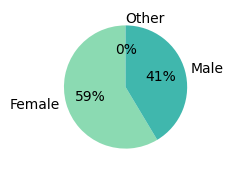

In [12]:
# Create gender pie chart
pieChart(df.gender)

<b>→ As can be seen in the chart above, the data is somewhat unbalanced, considering female entries account for almost 60% of the total.</b>

<i>"Other" category needs to be reassigned or removed entirely.</i> 

In [13]:
# Add 'gender' column to the "needs cleaning" list 
clean_data.append('gender')

##### 2.2.1.1.2. Analysis of Means

Here we will be taking at a closer look at the separate stroke means for each category, as well as the difference between these stroke means and the overall stroke mean.

In [14]:
# Get stroke mean and percentage difference to the overall stroke mean by gender
group_df = df[['gender', 'stroke']].groupby('gender').mean()
group_df = pd.concat((pd.DataFrame({'stroke': df.stroke.mean()}, {'Overall': 'Overall'}), group_df))
group_df['percent_diff_from_overall'] = (group_df.stroke - df.stroke.mean()) / df.stroke.mean() * 100
group_df.head()

,stroke,percent_diff_from_overall
Overall,0.048728,0.000000
Female,0.047094,-3.352891
Male,0.051064,4.793643
Other,0.000000,-100.000000


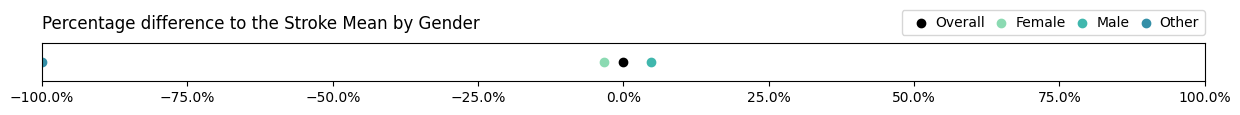

In [15]:
# Create gender percentage line
title = 'Percentage difference to the Stroke Mean by Gender'
percentLine(group_df.percent_diff_from_overall, group_df.index, title, True, -1, 1)

<b>→ As can be seen in the diagram above, if we ignore the "Other" category (which only represents a single data point), there does not seem to be a significant difference between the stroke means of males and females.</b>

##### 2.2.1.1.3. Hypothesis Testing

After observing the difference in stroke means between males and females in our sample, we want to determine if this difference is representative of the general population, i.e. we want to know if for the general population, the gender of an individual affects their chances of having a stroke.

In order to achieve this, we will conduct a Hypothesis test using a Chi-squared test (since both variables are categorical).

- H<sub>0</sub>: <b>μ<sub>1</sub></b> = <b>μ<sub>2</sub></b>
- H<sub>1</sub>: <b>μ<sub>1</sub></b> ≠ <b>μ<sub>2</sub></b>

where <b>μ<sub>1</sub></b> is the stroke mean for males, and <b>μ<sub>2</sub></b> is the stroke mean for females.

<pre><b>→ Null hypothesis:</b> The probability of a person having a stroke is <b>independent</b> of their gender,
                   i.e. the stroke mean for males and females is the same.
                   
<b>→ Alternative hypothesis:</b> The probability of a person having a stroke is <b>dependent</b> on their gender,
                          i.e. the stroke mean for males and females is different. </pre>

In [16]:
# Perform chi-squared test
contigency = pd.crosstab(df.gender, df.stroke)
stat, p, dof, exp_freq = stats.chi2_contingency(contigency)

print('p-value is ' + str(p))

p-value is 0.7895490538408245


In [17]:
# Assess hypothesis
significance_level = 0.05

if p > significance_level:
    print('Null hypothesis holds true, the stroke mean and gender are independent.')
else:
    print('Reject null hypothesis, the stroke mean is dependent on the gender.')

Null hypothesis holds true, the stroke mean and gender are independent.


<b>→ In other words, we have determined that for the general population, we can expect the gender to play no significant role on the likelihood of having a stroke, and can therefore safely remove the 'gender' column from our dataset.</b>

<i>'gender' column can be dropped, as it has not statistically significant effect on the stroke mean.</i>

In [18]:
# Append 'gender' to 'drop_columns' list
drop_columns.append('gender')

#### 2.2.1.2. Work Type

The 'work_type' column represents the type of work for each person in the dataset.

##### 2.2.1.2.1. Data Exploration

In [19]:
df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<b>→ The 'work_type' column contains 5 categories, including a "children" category, presumably for minors. Will be more closely inspected at a later stage.</b>

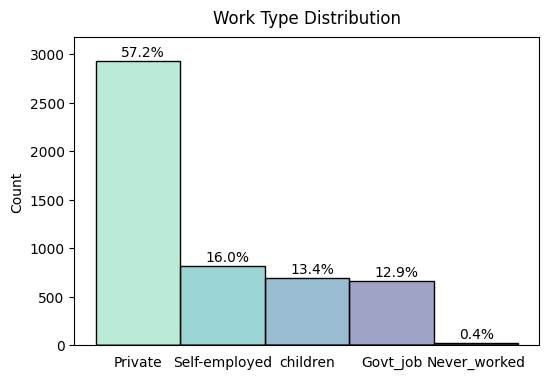

In [20]:
# Create work type histogram
histogram(df, 'work_type', 'Work Type Distribution', (6,4))

<b>→ As can be seen in the chart above, the data is fairly unbalanced, with the "Private" category accounting for close to 60% of the data. In addition, the "Never_worked" category contains almost no data, and may need to be removed.</b>

##### 2.2.1.2.2. Analysis of Means

Here we will again be taking at a closer look at the separate stroke means for each category, as well as the difference between these stroke means and the overall stroke mean.

In [21]:
# Get stroke means and percentage difference to the overall stroke mean by work type
group_mean = df[['work_type', 'stroke']].groupby('work_type').mean()
group_df = pd.merge(df['work_type'].value_counts().to_frame(), group_mean, left_index=True, right_index=True)
group_df = group_df.rename(columns={'count': 'tally', 'stroke': 'average'})
group_df = pd.concat((group_df, pd.DataFrame({'tally': df.stroke.count(), 'average': df.stroke.mean()}, {'Overall': 'Overall'})))
group_df['percent_diff_from_overall'] = (group_df.average - df.stroke.mean()) / df.stroke.mean() * 100
group_df = group_df.sort_values(by='tally', ascending=False)
group_df.head(10)

,tally,average,percent_diff_from_overall
Overall,5110,0.048728,0.000000
Private,2925,0.050940,4.539869
Self-employed,819,0.079365,62.873717
children,687,0.002911,-94.025593
Govt_job,657,0.050228,3.078983
Never_worked,22,0.000000,-100.000000


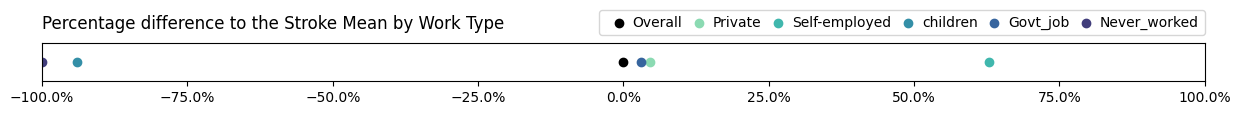

In [22]:
# Create work type percentage line
title = 'Percentage difference to the Stroke Mean by Work Type'
percentLine(group_df.percent_diff_from_overall, group_df.index, title, True, -1, 1)

<b>From the diagram above, we can see that:</b>
- In addition to having a very low number of values, the "Never_worked" category also has a mean of 0, meaning none of the people listed as having "Never_worked" have had a stroke. For this reason, this category should probably be removed entirely, or at least cleaned up. This will be dealt with at a later stage.
- The "children" category has a very low stroke mean compared to the overall mean, which suggests that minors are very unlikely to have a stroke, and may suggest that age plays a role in the likelihood of having a stroke.
- While the "Private" and "Govt_job" categories have stroke means very close to the overall mean, the "Self-employed" has a surprisingly large stroke mean difference to the overall mean. This will be investigated further in subsequent sections.

<i>"Never_worked" category needs to be reassigned or removed entirely.</i>

In [23]:
# Add 'work_type' column to the "needs cleaning" list 
clean_data.append('work_type')

##### 2.2.1.2.3. Hypothesis Testing

After observing the difference in stroke means between types of work in our sample, we want to again determine if this difference is representative of the general population, i.e. we want to know if for the general population, the type of work of an individual affects their chances of having a stroke.

In order to achieve this, we will conduct a Hypothesis test using a Chi-squared test (since both variables are categorical).

- H<sub>0</sub>: <b>μ<sub>1</sub></b> = <b>μ<sub>2</sub></b> = <b>μ<sub>3</sub></b> = <b>μ<sub>4</sub></b>
- H<sub>1</sub>: <b>μ<sub>1</sub></b> ≠ <b>μ<sub>2</sub></b> ≠ <b>μ<sub>3</sub></b> ≠ <b>μ<sub>4</sub></b>

where <b>μ<sub>i</sub></b> are the stroke means for each type of work.

<pre><b>→ Null hypothesis:</b> The probability of a person having a stroke is <b>independent</b> of their type of work,
                   i.e. the stroke mean for all types of work are the same.
                   
<b>→ Alternative hypothesis:</b> The probability of a person having a stroke is <b>dependent</b> on their type of work,
                          i.e. the stroke mean for all types of work different. </pre>

In [24]:
# Perform chi-squared test
contigency = pd.crosstab(df.work_type, df.stroke)
stat, p, dof, exp_freq = stats.chi2_contingency(contigency)

print('p-value is ' + str(p))

p-value is 5.397707801896119e-10


In [25]:
# Assess hypothesis
significance_level = 0.05

if p > significance_level:
    print('Null hypothesis holds true, the stroke mean and type of work are independent.')
else:
    print('Reject null hypothesis, the stroke mean is dependent on the type of work.')

Reject null hypothesis, the stroke mean is dependent on the type of work.


<b>→ In other words, we have determined that we can expect the type of work to have at least some influence on the likelihood of having a stroke for the general population, and should therefore keep the 'work_type' column for now.</b>

<i>Not enough statistical evidence to drop 'work_type' column.</i>

#### 2.2.1.3. Residence Type

The 'Residence_type' column represents the type of residence for each person in the dataset.

##### 2.2.1.3.1. Data Exploration

In [26]:
df.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<b>→ The 'Residence_type' column is binary, having only two categories "Urban" and "Rural".</b>

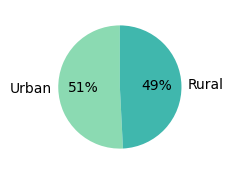

In [27]:
# Create residence type pie chart
pieChart(df.Residence_type)

<b>→ As can be seen in the chart above, the data is very balanced.</b>

##### 2.2.1.3.2. Analysis of Means

Here we will again be taking at a closer look at the separate stroke means for each category, as well as the difference between these stroke means and the overall stroke mean.

In [28]:
# Get stroke means and percentage difference to the overall stroke mean by residence type
group_df = df[['Residence_type', 'stroke']].groupby('Residence_type').mean()
group_df = pd.concat((pd.DataFrame({'stroke': df.stroke.mean()}, {'Overall': 'Overall'}), group_df))
group_df['percent_diff_from_overall'] = (group_df.stroke - df.stroke.mean()) / df.stroke.mean() * 100
group_df.head()

,stroke,percent_diff_from_overall
Overall,0.048728,0.000000
Rural,0.045346,-6.940411
Urban,0.052003,6.721184


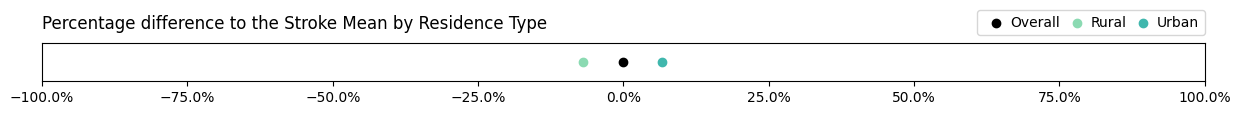

In [29]:
# Create residence type percentage line
title = 'Percentage difference to the Stroke Mean by Residence Type'
percentLine(group_df.percent_diff_from_overall, group_df.index, title, True, -1, 1)

<b>→ As can be seen in the diagram above, there does not seem to significant difference between the stroke means of urban residents and rural residents.</b>

##### 2.2.1.3.3. Hypothesis Testing

After observing the difference in stroke means between urban residents and rural residents in our sample, we want to once again determine if this difference is representative of the general population, i.e. we want to know if for the general population, the type of residence of an individual affects their chances of having a stroke.

In order to achieve this, we will conduct a Hypothesis test using a Chi-squared test (since both variables are categorical).

- H<sub>0</sub>: <b>μ<sub>1</sub></b> = <b>μ<sub>2</sub></b>
- H<sub>1</sub>: <b>μ<sub>1</sub></b> ≠ <b>μ<sub>2</sub></b>

where <b>μ<sub>1</sub></b> is the stroke mean for urban residents, and <b>μ<sub>2</sub></b> is the stroke mean for rural residents.

<pre><b>→ Null hypothesis:</b> The probability of a person having a stroke is <b>independent</b> of their type of residence,
                   i.e. the stroke mean for urban residents and rural residents is the same.
                   
<b>→ Alternative hypothesis:</b> The probability of a person having a stroke is <b>dependent</b> on their type of residence,
                          i.e. the stroke mean for urban residents and rural residents is different. </pre>

In [30]:
# Perform chi-squared test
contigency = pd.crosstab(df.Residence_type, df.stroke)
stat, p, dof, exp_freq = stats.chi2_contingency(contigency)

print('p-value is ' + str(p))

p-value is 0.29833169286876987


In [31]:
# Assess hypothesis
significance_level = 0.05

if p > significance_level:
    print('Null hypothesis holds true, the stroke mean and type of residence are independent.')
else:
    print('Reject null hypothesis, the stroke mean is dependent on the type of residence.')

Null hypothesis holds true, the stroke mean and type of residence are independent.


<b>→ In other words, we have determined that for the general population, we can expect the type of residence to also play no significant role on the likelihood of having a stroke, and can therefore safely remove the 'Residence_type' column from our dataset.</b>

<i>'Residence_type' column can be dropped, as it has not statistically significant effect on the stroke mean.</i>

In [32]:
# Append 'Residence_type' to 'drop_columns' list
drop_columns.append('Residence_type')

#### 2.2.1.4. Smoking Status

The 'smoking_status' column represents the smoking status for each person in the dataset. 

##### 2.2.1.4.1. Data Exploration

In [33]:
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<b>→ The 'work_type' column contains 4 categories, including an "Unknown" category.</b>

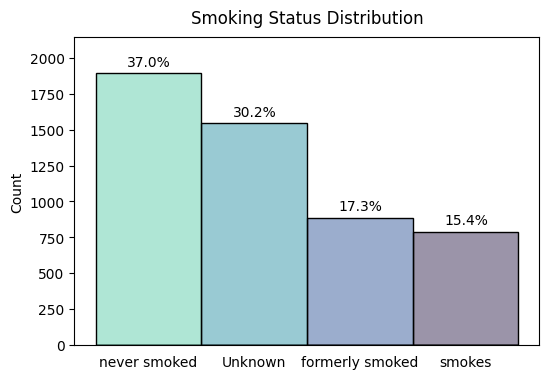

In [34]:
# Create smoking status bar chart
histogram(df, 'smoking_status', 'Smoking Status Distribution', (6,4))

<b>→ As can be seen in the chart above, the data is fairly unbalanced, with the "never smoked" category having more entries than the other two categories combined. In addition, the "Unknown" category occupies a fairly large percentage of the overall dataset.</b>

In [35]:
# Replace "Unknown" entries with NaN
df = df.replace('Unknown', np.nan)

<i>For the time being "Unknown" entries will be converted to null values, but they will only be fully dealt with at a later stage.</i>

In [36]:
# Append 'smoking_status' to 'missing_data' list
missing_data.append('smoking_status')

##### 2.2.1.4.2. Analysis of Means

Here we will again be taking at a closer look at the separate stroke means for each category, as well as the difference between these stroke means and the overall stroke mean.

In [37]:
# Get stroke means and difference from overall for each type of work
group_mean = df[['smoking_status', 'stroke']].groupby('smoking_status').mean()
group_df = pd.merge(df['smoking_status'].value_counts().to_frame(), group_mean, left_index=True, right_index=True)
group_df = group_df.rename(columns={'count': 'tally', 'stroke': 'average'})
group_df = pd.concat((group_df, pd.DataFrame({'tally': df.stroke.count(), 'average': df.stroke.mean()}, {'Overall': 'Overall'})))
group_df['percent_diff_from_overall'] = (group_df.average - df.stroke.mean()) / df.stroke.mean() * 100
group_df = group_df.sort_values(by='tally', ascending=False)
group_df.head(10)

,tally,average,percent_diff_from_overall
Overall,5110,0.048728,0.000000
never smoked,1892,0.047569,-2.379072
formerly smoked,885,0.079096,62.321603
smokes,789,0.053232,9.243056


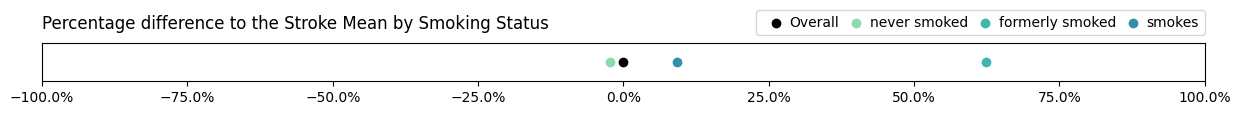

In [38]:
# Create percentage line
title = 'Percentage difference to the Stroke Mean by Smoking Status'
percentLine(group_df.percent_diff_from_overall, group_df.index, title, True, -1, 1)

<b>→ As can be seen in the diagram above, there is a quite significant difference between the stroke means of each smoking status, in particular for the "formerly smoked" status, whose stroke mean is surprisingly much higher than that of the "smokes" status.</b>

Age could once again potentially be playing a factor here as well, for example older people may simply be more likely to have reached the point where they have decided to stop smoking, as opposed to younger people who may simply have not reached that stage yet, and hence are still smoking. This will be investigated further in subsequent sections.

##### 2.2.1.4.3. Hypothesis Testing

After observing the difference in stroke means between each smoking status in our sample, we want to once again determine if this difference is representative of the general population, i.e. we want to know if for the general population, the smoking status of an individual affects their chances of having a stroke.

In order to achieve this, we will conduct a Hypothesis test using a Chi-squared test (since both variables are categorical).

- H<sub>0</sub>: <b>μ<sub>1</sub></b> = <b>μ<sub>2</sub></b> = <b>μ<sub>3</sub></b>
- H<sub>1</sub>: <b>μ<sub>1</sub></b> ≠ <b>μ<sub>2</sub></b> ≠ <b>μ<sub>3</sub></b>

where <b>μ<sub>i</sub></b> are the stroke means for each smoking status.

<pre><b>→ Null hypothesis:</b> The probability of a person having a stroke is <b>independent</b> of their smoking status,
                   i.e. the stroke mean for all smoking statuses is the same.
                   
<b>→ Alternative hypothesis:</b> The probability of a person having a stroke is <b>dependent</b> on their smoking status,
                          i.e. the stroke mean for all smoking statuses is different. </pre>

In [39]:
# Perform chi-squared test
smoking_df = df[df.smoking_status != 'Unknown']
contigency = pd.crosstab(smoking_df.smoking_status, smoking_df.stroke)
stat, p, dof, exp_freq = stats.chi2_contingency(contigency)

print('p-value is ' + str(p))

p-value is 0.0032854554819880173


In [40]:
significance_level = 0.05

if p > significance_level:
    print('Null hypothesis holds true, the stroke mean and type of work are independent.')
else:
    print('Reject null hypothesis, the stroke mean is dependent on the type of work.')

Reject null hypothesis, the stroke mean is dependent on the type of work.


<b>→ In other words, we have determined that for the general population, we can expect the smoking status to also have at least some influence on the likelihood of having a stroke, and should therefore keep the 'smoking_status' column for now.</b>

<i>Not enough statistical evidence to drop 'smoking_status' column.</i>

### 2.2.2. Boolean Data

#### 2.2.2.1. Ever Married

The 'ever_married' column represents the marriage status for each person in the dataset. 

##### 2.2.2.1.1. Data Exploration

In [41]:
df.ever_married.value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

<b>→ The boolean data in the 'ever_married' column is represented by "Yes" and "No" categories.</b>

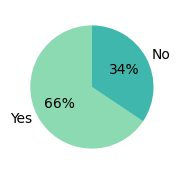

In [42]:
# Create married pie chart
pieChart(df.ever_married)

<b>→ As can be seen in the chart above, the data is fairly unbalanced, with the "Yes" category accounting for about two-thirds of all entries.</b>

##### 2.2.2.1.2. Analysis of Means

Here we will again be taking at a closer look at the separate stroke means for each category, as well as the difference between these stroke means and the overall stroke mean.

In [43]:
# Get stroke means and percentage difference to the overall stroke mean by 'ever married' status
group_df = df[['ever_married', 'stroke']].groupby('ever_married').mean()
group_df = pd.concat((pd.DataFrame({'stroke': df.stroke.mean()}, {'Overall': 'Overall'}), group_df))
group_df['percent_diff_from_overall'] = (group_df.stroke - df.stroke.mean()) / df.stroke.mean() * 100
group_df.head()

,stroke,percent_diff_from_overall
Overall,0.048728,0.000000
No,0.016505,-66.127458
Yes,0.065613,34.651340


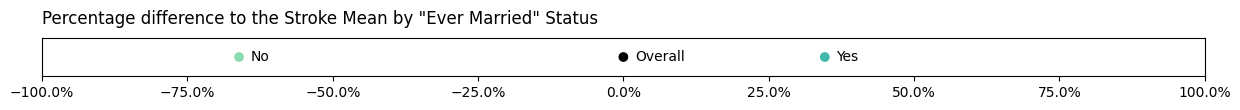

In [44]:
# Create 'ever married' percentage line
title = 'Percentage difference to the Stroke Mean by "Ever Married" Status'
percentLine(group_df.percent_diff_from_overall, group_df.index, title, False, -1, 1)

<b>→ As can be seen in the diagram above, there is a significant difference between the stroke means of each "ever married" status. This may be due to the fact that older people are more likely to be married, but this will be investigated further in subsequent sections.</b>

##### 2.2.2.1.3. Hypothesis Testing

After observing the difference in stroke means between the "Yes" and "No" categories in our sample, we want to again determine if this difference is representative of the general population, i.e. we want to know if for the general population, the "ever married" status of an individual affects their chances of having a stroke.

In order to achieve this, we will conduct a Hypothesis test using a Chi-squared test (since both variables are categorical).

- H<sub>0</sub>: <b>μ<sub>1</sub></b> = <b>μ<sub>2</sub></b>
- H<sub>1</sub>: <b>μ<sub>1</sub></b> ≠ <b>μ<sub>2</sub></b>

where <b>μ<sub>1</sub></b> is the stroke mean for people who have ever been married, and <b>μ<sub>2</sub></b> is the stroke mean for people who have never married.

<pre><b>→ Null hypothesis:</b> The probability of a person having a stroke is <b>independent</b> of whether they have ever been married,
                   i.e. the stroke mean for "ever married" and "never married" is the same.
                   
<b>→ Alternative hypothesis:</b> The probability of a person having a stroke is <b>dependent</b> on whether they have ever been married,
                          i.e. the stroke mean for "ever married" and "never married" is different. </pre>

In [45]:
# Perform chi-squared test
contigency = pd.crosstab(df.ever_married, df.stroke)
stat, p, dof, exp_freq = stats.chi2_contingency(contigency)

print('p-value is ' + str(p))

p-value is 1.6389021142314745e-14


In [46]:
# Assess hypothesis
significance_level = 0.05

if p > significance_level:
    print('Null hypothesis holds true, the stroke mean and the "ever married" status are independent.')
else:
    print('Reject null hypothesis, the stroke mean is dependent on the "ever married" status.')

Reject null hypothesis, the stroke mean is dependent on the "ever married" status.


<b>→ In other words, we have determined that for the general population, we can expect the "ever married" status to also have at least some influence on the likelihood of having a stroke, and should therefore keep the 'ever_married' column for now.</b>

<i>Not enough statistical evidence to drop 'ever_married' column.</i>

#### 2.2.2.2. Hypertension

The 'hypertension' column represents the hypertension status for each person in the dataset.

##### 2.2.2.2.1. Data Exploration

In [47]:
df.hypertension.value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

<b>→ The boolean data in the 'hypertension' column is represented by "0" and "1" categories.</b>

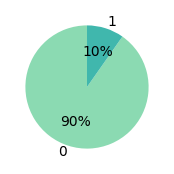

In [48]:
# Create hypertension pie chart
pieChart(df.hypertension)

<b>→ As can be seen in the chart above, the data is very unbalanced, with the "0" category accounting for about 90% of all entries.</b>

##### 2.2.2.2.2. Analysis of Means

Here we will again be taking at a closer look at the separate stroke means for each category, as well as the difference between these stroke means and the overall stroke mean.

In [49]:
# Convert binary hypertension data to booleans
boolean = {0: 'False', 1: 'True'}
boolean_df = df.copy()
boolean_df['hypertension'] = boolean_df.hypertension.map(boolean)
boolean_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,False,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,False,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,False,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,False,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,True,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<i>The numeric boolean data was causing problems when plotting 'percentLine', so it was remapped to categorical boolean data.</i>

In [50]:
# Get stroke means and percentage difference to the overall stroke mean by hypertension status
group_df = boolean_df[['hypertension', 'stroke']].groupby('hypertension').mean()
group_df = pd.concat((pd.DataFrame({'stroke': boolean_df.stroke.mean()}, {'Overall': 'Overall'}), group_df))
group_df['percent_diff_from_overall'] = (group_df.stroke - boolean_df.stroke.mean()) / boolean_df.stroke.mean() * 100
group_df.head()

,stroke,percent_diff_from_overall
Overall,0.048728,0.000000
False,0.039679,-18.570204
True,0.132530,171.979484


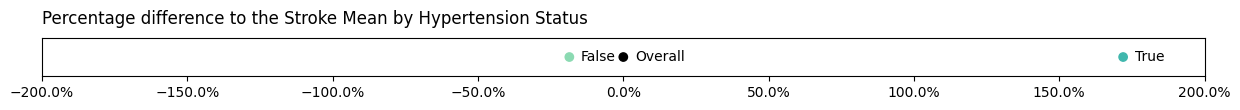

In [51]:
# Create hypertension percentage line
title = 'Percentage difference to the Stroke Mean by Hypertension Status'
percentLine(group_df.percent_diff_from_overall, group_df.index, title, False, -2, 2)

<b>→ As can be seen in the diagram above, there is a very significant difference between the stroke means of each hypertension status. In fact, that data seems to suggest that having hypertension substantially increases your chances of having a stroke.</b>

##### 2.2.2.2.3. Hypothesis Testing

After observing the difference in stroke means between the "True" and "False" categories in our sample, we want to determine once again if this difference is representative of the general population, i.e. we want to know if for the general population, the hypertension status of an individual affects their chances of having a stroke.

In order to achieve this, we will conduct a Hypothesis test using a Chi-squared test (since both variables are categorical).

- H<sub>0</sub>: <b>μ<sub>1</sub></b> = <b>μ<sub>2</sub></b>
- H<sub>1</sub>: <b>μ<sub>1</sub></b> ≠ <b>μ<sub>2</sub></b>

where <b>μ<sub>1</sub></b> is the stroke mean for people with hypertension, and <b>μ<sub>2</sub></b> is the stroke mean for people without hypertension.

<pre><b>→ Null hypothesis:</b> The probability of a person having a stroke is <b>independent</b> of their hypertension status,
                   i.e. the stroke mean for people with hypertension and people without hypertension is the same.
                   
<b>→ Alternative hypothesis:</b> The probability of a person having a stroke is <b>dependent</b> on their hypertension status,
                          i.e. the stroke mean for people with hypertension and people without hypertension is different. </pre>

In [52]:
# Perform chi-squared test
contigency = pd.crosstab(df.hypertension, df.stroke)
stat, p, dof, exp_freq = stats.chi2_contingency(contigency)

print('p-value is ' + str(p))

p-value is 1.661621901511823e-19


In [53]:
# Assess hypothesis
significance_level = 0.05

if p > significance_level:
    print('Null hypothesis holds true, the stroke mean and the hypertension status are independent.')
else:
    print('Reject null hypothesis, the stroke mean is dependent on the hypertension status.')

Reject null hypothesis, the stroke mean is dependent on the hypertension status.


<b>→ In other words, we have determined that for the general population, we can expect the hypertension status to have at least some influence on the likelihood of having a stroke, and should therefore keep the 'hypertension' column for now.</b>

<i>Not enough statistical evidence to drop 'hypertension' column.</i>

#### 2.2.2.3. Heart Disease

The 'heart_disease' column represents the heart disease status for each person in the dataset. 

##### 2.2.2.3.1. Data Exploration

In [54]:
df.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

<b>→ The boolean data in the 'heart_disease' column is also represented by "0" and "1" categories.</b>

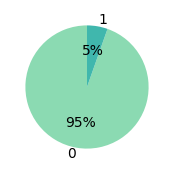

In [55]:
# Create heart disease pie chart
pieChart(df.heart_disease)

<b>→ As can be seen in the chart above, the 'heart_disease' data is even more unbalanced than the 'hypertension' data, with the "0" category accounting for about 95% of all entries.</b>

##### 2.2.2.3.2. Analysis of Means

Here we will again be taking at a closer look at the separate stroke means for each category, as well as the difference between these stroke means and the overall stroke mean.

In [56]:
# Convert binary heart disease data to booleans
boolean = {0: 'False', 1: 'True'}
boolean_df = df.copy()
boolean_df['heart_disease'] = boolean_df.heart_disease.map(boolean)
boolean_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,True,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,False,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,True,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,False,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,False,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<i>Like before, the numeric boolean data was causing problems when trying to plot 'percentLine', so it was remapped to categorical boolean data.</i>

In [57]:
# Get stroke means and percentage difference to the overall stroke mean by heart disease status
group_df = boolean_df[['heart_disease', 'stroke']].groupby('heart_disease').mean()
group_df = pd.concat((pd.DataFrame({'stroke': boolean_df.stroke.mean()}, {'Overall': 'Overall'}), group_df))
group_df['percent_diff_from_overall'] = (group_df.stroke - boolean_df.stroke.mean()) / boolean_df.stroke.mean() * 100
group_df.head()

,stroke,percent_diff_from_overall
Overall,0.048728,0.000000
False,0.041787,-14.243652
True,0.170290,249.470345


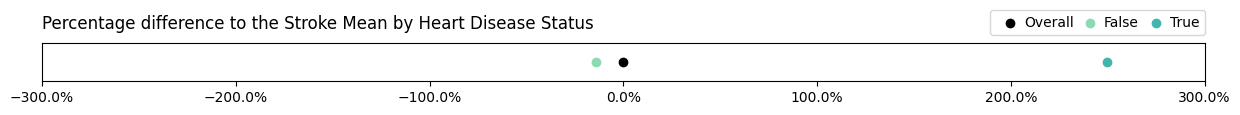

In [58]:
# Create heart disease percentage line
title = 'Percentage difference to the Stroke Mean by Heart Disease Status'
percentLine(group_df.percent_diff_from_overall, group_df.index, title, True, -3, 3)

<b>→ As can be seen in the diagram above, there is a also very significant difference between the stroke means of each heart disease status. In fact, the difference is even more stark than that for the hypertension status, suggesting that having heart disease may be a greater indicator of having a stroke, than having hypertension.</b>

##### 2.2.2.3.3. Hypothesis Testing

After observing the difference in stroke means between the "True" and "False" categories in our sample, we want to again determine if this difference is representative of the general population, i.e. we want to know if for the general population, the heart disease status of an individual affects their chances of having a stroke.

In order to achieve this, we will conduct a Hypothesis test using a Chi-squared test (since both variables are categorical).

- H<sub>0</sub>: <b>μ<sub>1</sub></b> = <b>μ<sub>2</sub></b>
- H<sub>1</sub>: <b>μ<sub>1</sub></b> ≠ <b>μ<sub>2</sub></b>

where <b>μ<sub>1</sub></b> is the stroke mean for people with heart disease, and <b>μ<sub>2</sub></b> is the stroke mean for people without heart disease.

<pre><b>→ Null hypothesis:</b> The probability of a person having a stroke is <b>independent</b> of their heart disease status,
                   i.e. the stroke mean for people with heart disease and people without heart disease is the same.
                   
<b>→ Alternative hypothesis:</b> The probability of a person having a stroke is <b>dependent</b> on their heart disease status,
                          i.e. the stroke mean for people with heart disease and people without heart disease is different. </pre>

In [59]:
# Perform chi-squared test
contigency = pd.crosstab(df.heart_disease, df.stroke)
stat, p, dof, exp_freq = stats.chi2_contingency(contigency)

print('p-value is ' + str(p))

p-value is 2.0887845685229236e-21


In [60]:
# Assess hypothesis
significance_level = 0.05

if p > significance_level:
    print('Null hypothesis holds true, the stroke mean and the heart disease status are independent.')
else:
    print('Reject null hypothesis, the stroke mean is dependent on the heart disease status.')

Reject null hypothesis, the stroke mean is dependent on the heart disease status.


<b>→ In other words, we have determined that for the general population, we can expect the heart disease status, as well, to have at least some influence on the likelihood of having a stroke, and should therefore keep the 'heart_disease' column for now.</b>

<i>Not enough statistical evidence to drop 'heart_disease' column.</i>

### 2.2.3. Quantitative Data

Before analysing the remaining feature variables, we will first take a look at the correlation between all binary and quantitative variables in the dataset and the target variable, the stroke status.

In order to create a heatmap based on the correlation of the binary and quantitative data with the stroke status, we need to first filter by the quantitative variables and then map the binary categorical variables to numeric booleans.

In [61]:
# Create dataframe containing only columns with quantitative data
quant_df = df.copy()
quant_df = quant_df[['age', 'avg_glucose_level', 'bmi', 'stroke']]

In [62]:
# Convert categorical binary data to numerical binary data and then create a dataframe with all binary and quantitative data
binary_gender = {'Male': 0, 'Female': 1}
binary_married = {'No': 0, 'Yes': 1}
binary_residence = {'Rural': 0, 'Urban': 1}

biquant_df = df.copy()
biquant_df = biquant_df[['gender', 'Residence_type', 'ever_married', 'hypertension', 'heart_disease', 'age', 'avg_glucose_level', 'bmi', 'stroke']]
biquant_df.gender = biquant_df.gender.map(binary_gender)
biquant_df.ever_married = biquant_df.ever_married.map(binary_married)
biquant_df.Residence_type = biquant_df.Residence_type.map(binary_residence)

print(biquant_df.shape)
biquant_df.head()

(5110, 9)


,gender,Residence_type,ever_married,hypertension,heart_disease,age,avg_glucose_level,bmi,stroke
0,0.0,1,1,0,1,67.0,228.69,36.6,1
1,1.0,0,1,0,0,61.0,202.21,NaN,1
2,0.0,0,1,0,1,80.0,105.92,32.5,1
3,1.0,1,1,0,0,49.0,171.23,34.4,1
4,1.0,0,1,1,0,79.0,174.12,24.0,1


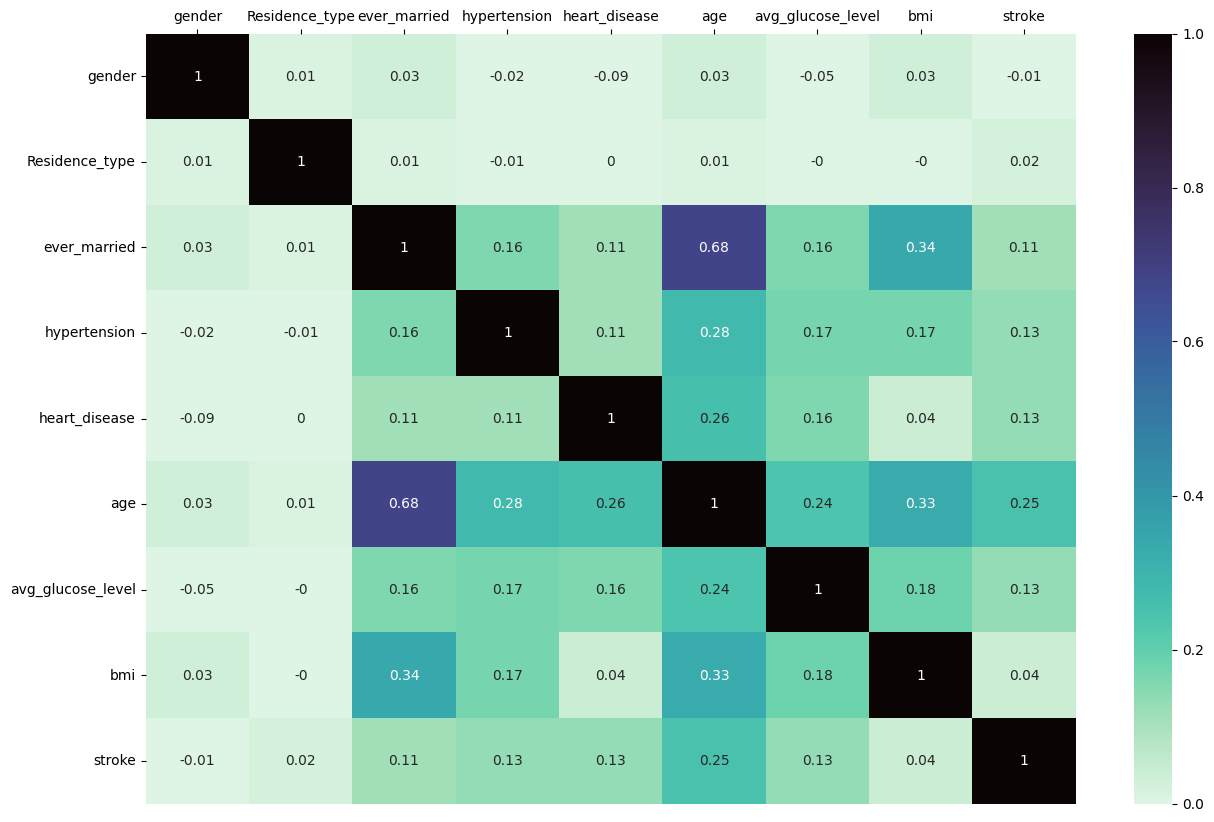

In [63]:
# Create stroke heatmap with all binary and quantitative data
heatmap_df = biquant_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(round(heatmap_df, 2), annot=True, cmap='mako_r', vmin=0, vmax=1, ax=ax)
ax.tick_params(axis='x', labelbottom=False, bottom=False, top=True, labeltop=True)
plt.show()

<b>From the heatmap above we can see that:</b>

- For the stroke:
    - The 'gender' and 'residence type' variables are again confirmed to have little to no influence on the stroke status.
    - The 'ever_married', 'hypertension', and 'heart_disease' variables are again shown to have at least some influence on the stroke status.
    - Among the quantitative variables, 'age' has by far the highest correlation with the stroke status, the 'avg_glucose_level', also has a notable correlation.
    - By contrast the 'bmi' variable seems to have little to no correlation with the stroke status.
    
<b> 
</b>
    
- For the age:
    - All variables, beside 'gender' and 'Residence_type', seem to have at least a moderate correlation with age.
    - 'Ever_married', in particular, as previously speculated has a very strong correlation with age.

#### 2.2.3.1. Age

The 'age' column represents the age in years for each person in the dataset. 

##### 2.2.3.1.1. Correlation

In [64]:
# Get correlation between age and stroke status from heatmap
heatmap_df.age

gender               0.027752
Residence_type       0.014180
ever_married         0.679125
hypertension         0.276398
heart_disease        0.263796
age                  1.000000
avg_glucose_level    0.238171
bmi                  0.333398
stroke               0.245257
Name: age, dtype: float64

<b>→ As we observed earlier, age seems to have a noticeable correlation with the stroke status, and should therefore be kept.</b>

<i>Close to moderate correlation with the stroke mean. Should be kept.</i>

##### 2.2.3.1.2. Data Exploration

In [65]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

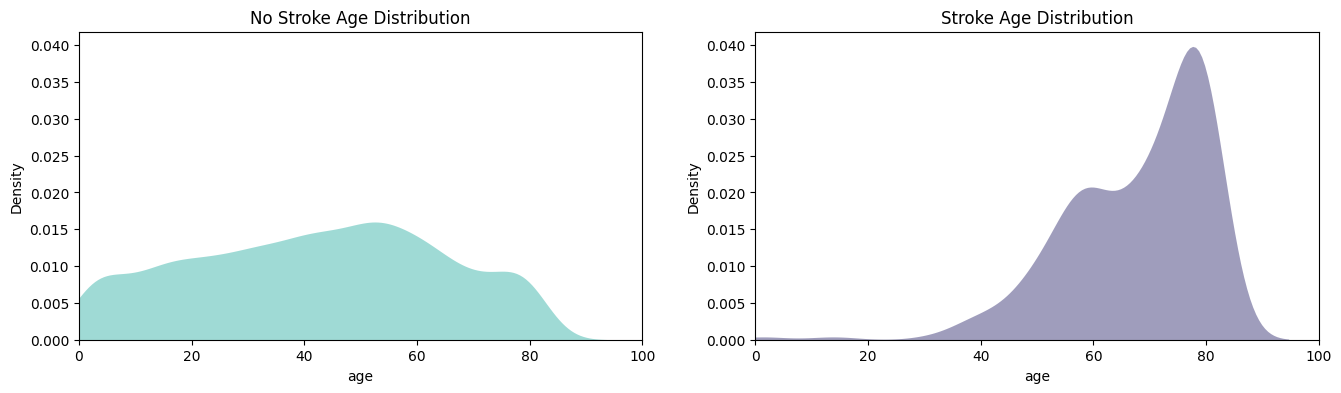

In [66]:
# Create age kde plot by stroke status
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
sns.kdeplot(data=quant_df[quant_df.stroke==0], x='age', fill=True, color=mako[1], linewidth=0, alpha=0.5, ax=ax1)
sns.kdeplot(data=quant_df[quant_df.stroke==1], x='age', fill=True, color=mako[4], linewidth=0, alpha=0.5, ax=ax2)
ax1.set(title='No Stroke Age Distribution')
ax1.set_xlim(0,100)
ax1.set_ylim(ax2.get_ylim())
ax2.set(title='Stroke Age Distribution')
ax2.set_xlim(ax1.get_xlim())
plt.show()

<b>→ From the charts above, we can see that for the "No Stroke" category, the age distribution is fairly even. However, for the "Stroke" category it is very skewed towards older ages. This may suggest that old age makes it more likely to have a stroke.</b>

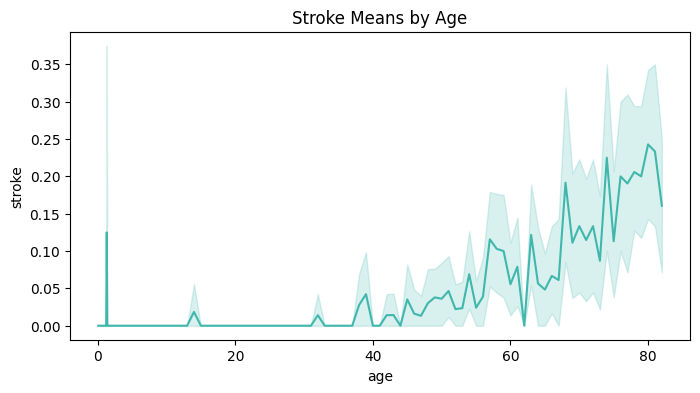

In [67]:
# Create age line chart by stroke mean
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(data=df, x='age', y='stroke', color=mako[1], ax=ax)
plt.title('Stroke Means by Age')
plt.show()

<b>→ This chart again seems to suggest that old age makes it more likely to have a stroke.</b>

##### 2.2.3.1.3. Outliers

Here we will simply check if the 'age' column contains any outliers.

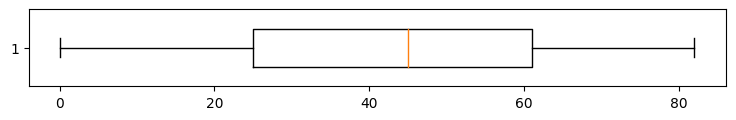

In [68]:
# Create age box plot
plt.figure(figsize=(9,1))
plt.boxplot(df.age, vert=False, widths=0.5)
plt.show()

<b>→ No outliers.</b>

#### 2.2.3.2. Average Glucose Level

The 'avg_glucose_level' column represents the average glucose level, presumably in mg/dL, for each person in the dataset. 

##### 2.2.3.2.1. Correlation

In [69]:
# Get correlation between averge glucose level and stroke status from heatmap
heatmap_df.avg_glucose_level

gender              -0.054722
Residence_type      -0.004946
ever_married         0.155068
hypertension         0.174474
heart_disease        0.161857
age                  0.238171
avg_glucose_level    1.000000
bmi                  0.175502
stroke               0.131945
Name: avg_glucose_level, dtype: float64

<b>→ Again, as we observed earlier, avg_glucose_level seems to have at least some correlation with the stroke status, and should therefore be kept.</b>

<i>Weak, but existent, correlation with the stroke mean. Should be kept.</i>

##### 2.2.3.2.2. Data Exploration

In [70]:
quant_df.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

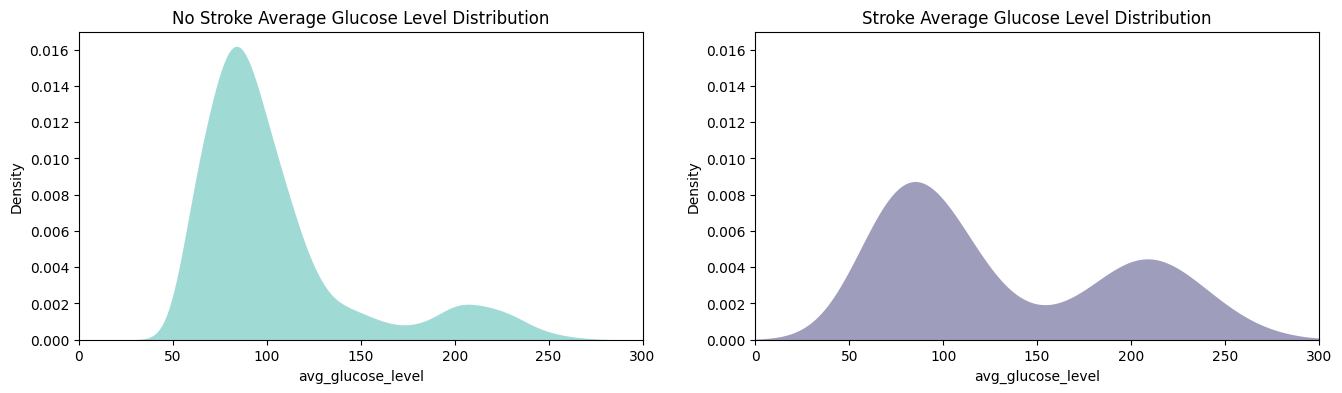

In [71]:
# Create averge glucose level kde plot
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
sns.kdeplot(data=quant_df[quant_df.stroke==0], x='avg_glucose_level', fill=True, color=mako[1], linewidth=0, alpha=0.5, ax=ax1)
sns.kdeplot(data=quant_df[quant_df.stroke==1], x='avg_glucose_level', fill=True, color=mako[4], linewidth=0, alpha=0.5, ax=ax2)
ax1.set(title='No Stroke Average Glucose Level Distribution')
ax1.set_xlim(0,300)
ax2.set(title='Stroke Average Glucose Level Distribution')
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())
plt.show()

<b>→ Unlike the 'age' column, for the 'avg_glucose_level' it is the "Stroke" category that appears to be more evenly distributed, and it is the "No Stroke" category that appears to more skewed, in this case towards lower glucose levels. Nevertheless, the chart seems to suggest that higher glucose levels makes it more likely to have a stroke.</b>

##### 2.2.3.2.3. Outliers

Here we will again simply check if the 'avg_glucose_level' column contains any outliers.

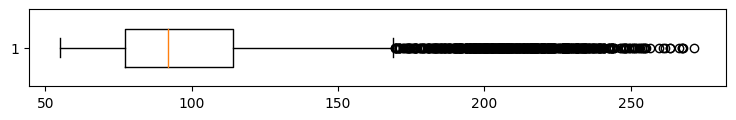

In [72]:
# Create averge glucose level boxplot
plt.figure(figsize=(9,1))
plt.boxplot(quant_df.avg_glucose_level, vert=False, widths=0.5)
plt.show()

<b>→ From the boxplot above we can see that as we speculated earlier, there not only some outliers, but a fairly large number of outliers. However, before removing them prematurely, we will be taking a closer look at them.</b>

In [73]:
# Get outliers
q1 = np.quantile(quant_df.avg_glucose_level, 0.25)
q3 = np.quantile(quant_df.avg_glucose_level, 0.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
glucose_outliers = quant_df.avg_glucose_level[quant_df.avg_glucose_level > upper_bound]
print(glucose_outliers.shape)
glucose_outliers.head()

(627,)


0    228.69
1    202.21
3    171.23
4    174.12
5    186.21
Name: avg_glucose_level, dtype: float64

<b>→ The 'avg_glucose_level' column has 627 outliers in total.</b>

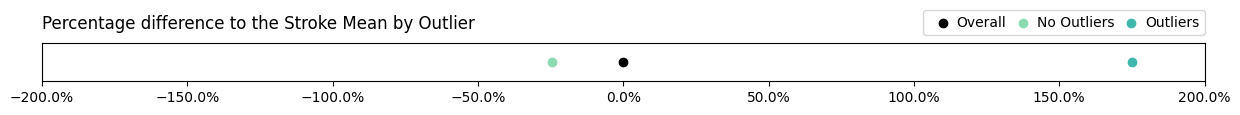

In [74]:
# Create outlier percentage line
overall_mean = quant_df.stroke.mean()
no_outlier_mean = quant_df[~quant_df.index.isin(glucose_outliers.index)].stroke.mean()
outlier_mean = quant_df[quant_df.index.isin(glucose_outliers.index)].stroke.mean()

percents = ([overall_mean, no_outlier_mean, outlier_mean] - overall_mean) / overall_mean * 100
labels = ['Overall', 'No Outliers', 'Outliers']

title = 'Percentage difference to the Stroke Mean by Outlier'
percentLine(percents, labels, title, True, -2, 2)

<b>→ From the chart above, we can see that there is a very significant difference between the stroke mean of the 'avg_glucose_level' outliers and its other values. This may suggest that these outliers are actually "true outliers", i.e. naturally occuring outliers, that may be occuring specifically because these people are having a stroke, or at least suggests that having very high glucose levels makes it significantly more likley to have a stroke. For this reason, despite technically being outliers, we should probably not be removing them from our dataset.</b>

In [75]:
# Get number of strokes in total, for non-outliers, and for outliers
total_strokes = df[(df.stroke == 1)].shape[0]
nonoutlier_strokes = df[(~df.index.isin(glucose_outliers.index)) & (df.stroke == 1)].shape[0]
outlier_strokes = df[(df.index.isin(glucose_outliers.index)) & (df.stroke == 1)].shape[0]
index = ['Total', 'Non-outlier', 'Outlier']
data = pd.DataFrame([total_strokes, nonoutlier_strokes, outlier_strokes], columns=['Strokes'], index=index)
data.head()

,Strokes
Total,249
Non-outlier,165
Outlier,84


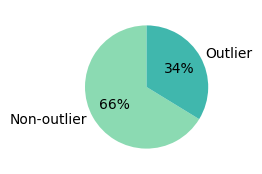

In [76]:
fig, ax = plt.subplots(figsize=(2,2))
ax.pie(data.Strokes[1:3], labels=index[1:3], colors=mako, autopct='%.0f%%', startangle=90)
plt.show()

<b>→ As can be seen from the chart above, while not representing a majority of the stroke occurences, the 'avg_glucose_level' outliers do represent a significant percentage of the overall number of stroke occurences. Considering the fact that the stroke variable is already very unbalanced, with stroke occurences accounting for less than 5% of the total values, we have another reason to keep them.</b>

<i>Keep outliers.</i>

#### 2.2.3.3. BMI

The 'bmi' column represents the body mass index values, presumably in kg/m², for each person in the dataset. 

##### 2.2.3.3.1. Correlation

In [77]:
# Get correlation between bmi and stroke status from heatmap
heatmap_df.bmi

gender               0.026164
Residence_type      -0.000122
ever_married         0.341695
hypertension         0.167811
heart_disease        0.041357
age                  0.333398
avg_glucose_level    0.175502
bmi                  1.000000
stroke               0.042374
Name: bmi, dtype: float64

<b>→ Considering there is next to no correlation between the bmi and the stroke status, we can safely remove the 'bmi' column.</b> 

<i>No significant correlation with the stroke mean. Can be dropped.</i>

In [78]:
# Append 'bmi' column to 'drop_columns' list
drop_columns.append('bmi')

# 3. Data Analysis

As we were going through the features in the "Exploratory Data Analysis" section and were analysing their stroke means, we speculated that for some of the variables that showed signs of having an influence on the stroke status, that their may be another underlying factor that was causing that relationship.

In particular, we speculated that variables such as 'work_type' and 'ever_married' are likely to be highly dependent on the 'age' variable, meaning their actual influence on the stroke status may not be directly attributable to them.

As we then got to the "Quantitative Data" section and calculated the correlation between all binary and quantitative variables, it became apparent that most variables had at least a moderate correlation with the 'age' variable.

<b>Objective:</b> For this reason, the main purpose of this section will be to control for age and then re-examine the relationship between the relevant feature variables and the stroke status. This will allow us to determine whether their influence on the stroke status were based on their own merit, or whether they were instead based on their high correlation with the 'age' variable.

<b>Methodology:</b> In order to determine this, we will start by creating a new ordinal 'age_range' variable, which will consist of bins from the age category. This new variable will then allow us to conduct new hypothesis tests, using a Chi-squared test, for all relevant variables with respect to the stroke status, while controlling for age.

In [79]:
analysis_df = df.copy()

## 3.1. Control Variable

Here we will simply create the new 'age_range' variable.

In [80]:
analysis_df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [81]:
# Create bins from 'age' column
labels = [str(round(x*(analysis_df.age.max()/10),1)) + '+' for x in range(10)]
analysis_df['age_range'] = pd.cut(x=analysis_df.age, bins=10, labels=labels)
print(analysis_df .shape)
analysis_df.head()

(5110, 13)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65.6+
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,57.4+
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,73.8+
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,41.0+
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,73.8+


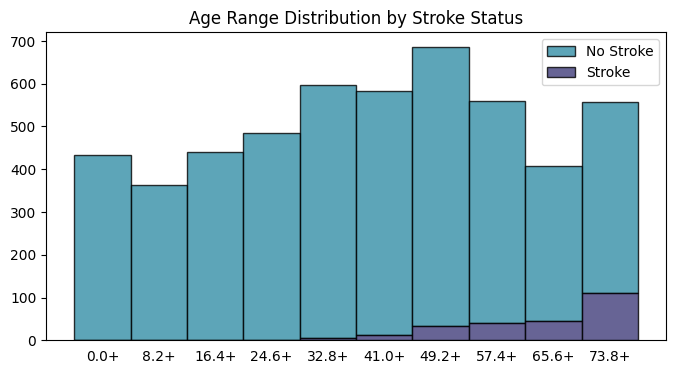

In [82]:
# Create stacked age range bar chart
barChartByStroke(analysis_df, 10, labels, 'age', 'Age Range Distribution by Stroke Status')

<b>→ Now we have created our new ordinal 'age_range' variable based on 10 bins from the 'age' variable.</b> 

<i>However, we will not be needing the 'age_range' variable for our Machine Learning model. Will be dropped.</i>

In [83]:
drop_columns.append('age_range')

## 3.2. Hypothesis Testing

Now that we have created the 'age_range' variable, we can proceed with the hypothesis tests for each relevant feature variable.

In [84]:
def chiSqTestWithControlVar(df, control_var, indep_var, dep_var):
    """
    Performs multiple Chi-squared tests based on a dataframe, containing columns for the control variables, the independent variables,
    and the dependent variable. Returns a list of the control variables, and another list of the resulting p-values for each control variable.
    """
    
    index = df[control_var].value_counts().sort_index().index
    
    control_list = []
    p_list = []

    for i in index:

        try:
            
            control_df = df[df[control_var] == i]

            contigency = pd.crosstab(control_df[indep_var], control_df[dep_var])
            chi2, p, dof, exp_freq = stats.chi2_contingency(contigency)
            
            control_list.append(i)
            p_list.append(p)
            
        except:
            control_list.append(i)
            p_list.append(np.nan)
            
    return control_list, p_list

### 3.2.1. Work Type

We start by creating a dataframe with:
- A column for the control variables, i.e. the 'age_range',
- A column for the independent variables, i.e. 'work_type', and finally
- A column with the dependent variable, i.e. 'stroke'. 

In [85]:
indep_var = 'work_type'

In [86]:
# Filter by the chosen variables
control_df = analysis_df.copy()
control_df = control_df[['age_range', indep_var, 'stroke']]
print(control_df.shape)
control_df.head()

(5110, 3)


,age_range,work_type,stroke
0,65.6+,Private,1
1,57.4+,Self-employed,1
2,73.8+,Private,1
3,41.0+,Private,1
4,73.8+,Self-employed,1


In [87]:
# Perform chi-squared tests
control, p = chiSqTestWithControlVar(control_df, 'age_range', indep_var, 'stroke')
p_df = pd.DataFrame({'age_range': control, 'p_value': p})
print(p_df.shape)
p_df.T

(10, 2)


,0,1,2,3,4,5,6,7,8,9
age_range,0.0+,8.2+,16.4+,24.6+,32.8+,41.0+,49.2+,57.4+,65.6+,73.8+
p_value,0.997683,0.980741,1.0,0.889061,0.079656,0.406697,0.537772,0.414255,0.899795,0.023444


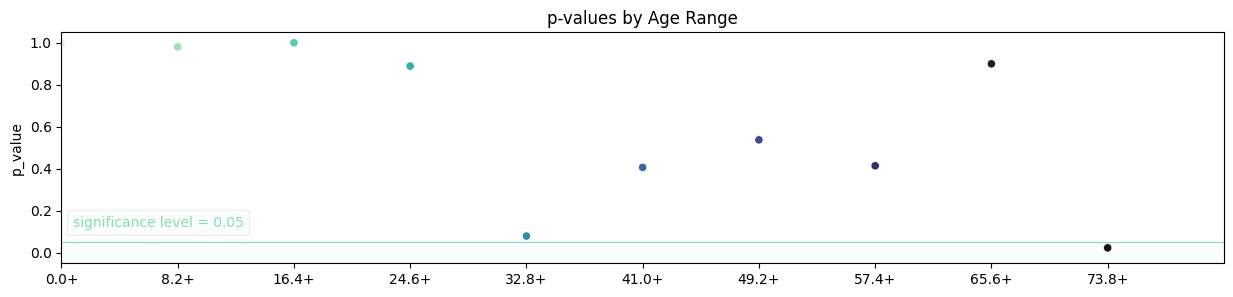

In [88]:
# Create p-values scatter plot
pScatterPlot(p_df, 'age_range', 'p-values by Age Range')

<b>→ As we can see from the chart above, when controlling for the age range, the type of work has no influence on the stroke status for most age ranges. However, for the 73.8+ years age range, the type of work still has a significant influence on the stroke status. For this reason, we will be keeping the 'work_type' variable.</b>

<i>When controlling for the age range, the stroke status is dependent on 'work_type' in certain age ranges. Keep column.</i>

### 3.2.2. Smoking

#### 3.2.2.1. Smoking Status

We start again by creating a dataframe with:
- A column for the control variables, i.e. the 'age_range',
- A column for the independent variables, i.e. 'smoking_status', and finally
- A column with the dependent variable, i.e. 'stroke'. 

In [89]:
indep_var = 'smoking_status'

In [90]:
# Filter by the chosen variables
control_df = analysis_df.copy()
control_df = control_df[['age_range', indep_var, 'stroke']]
print(control_df.shape)
control_df.head()

(5110, 3)


,age_range,smoking_status,stroke
0,65.6+,formerly smoked,1
1,57.4+,never smoked,1
2,73.8+,never smoked,1
3,41.0+,smokes,1
4,73.8+,never smoked,1


In [91]:
# Perform chi-squared tests
control, p = chiSqTestWithControlVar(control_df, 'age_range', indep_var, 'stroke')
p_df = pd.DataFrame({'age_range': control, 'p_value': p})
print(p_df.shape)
p_df.T

(10, 2)


,0,1,2,3,4,5,6,7,8,9
age_range,0.0+,8.2+,16.4+,24.6+,32.8+,41.0+,49.2+,57.4+,65.6+,73.8+
p_value,NaN,1.0,1.0,0.35109,0.233057,0.823997,0.755802,0.002444,0.90967,0.921961


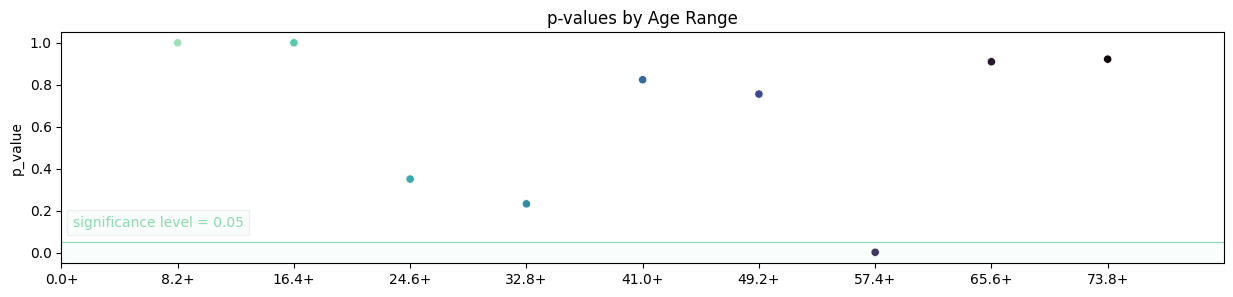

In [92]:
# Create p-values scatter plot
pScatterPlot(p_df, 'age_range', 'p-values by Age Range')

<b>→ Similarly to 'work_type', when controlling for the age range, the smoking status has no influence on the stroke status for most age ranges. However, here again one specific age_range defies that trend. In this case, it is the 57.4+ age range that still has a significant influence on the stroke status. So, like before, we will be keeping the 'smoking_status' variable.</b>

<i>When controlling for the age range, the stroke status is dependent on 'smoking_status' in certain age ranges. Keep column.</i>

#### 3.2.2.2. Only Consider Former and Current Smokers

Despite the fact that we have decided to keep the 'smoking_status' variable, due to our observations in the  "Exploratory Data Analysis" section, we will be taking a closer look at two 'smoking_status' categories, "formerly smoked" and "smokes".

More specifically, when we were previously exploring the 'smoking_status' column, we noticed that the "formerly smoked" category had a surprisingly high stroke mean compared to the "smokes" category, and speculated that this may be due to average age of "former smokers" potentially being higher than "current smokers", rather than the act of stopping to smoke itself.

For this reason, in this section, we will specfically only look at the difference between the "formerly smoked" category and the "smokes" category.

In [93]:
analysis_df[['smoking_status', 'age']].groupby('smoking_status').mean().round(2)

,age
smoking_status,
formerly smoked,54.93
never smoked,46.74
smokes,47.10


<b>→ As speculated, the "formerly smoked" category has by far the highest average age. Now we can proceed to determine whether the difference in stroke means holds up when controlling for the age range.</b>

In [94]:
# Filter out "never smoked" category, map the remaining two categories as booleans, and filter by the chosen variables
smoked_dict = {'formerly smoked': 0, 'smokes': 1}
smoked_df = analysis_df.copy()
smoked_df = smoked_df[~smoked_df.smoking_status.isna()]
smoked_df = smoked_df[smoked_df.smoking_status != 'never smoked']
smoked_df['smoking_status'] = smoked_df.smoking_status.map(smoked_dict)
smoked_df = smoked_df[['age_range', 'smoking_status', 'stroke']]
print(smoked_df.shape)
smoked_df.head()

(1674, 3)


,age_range,smoking_status,stroke
0,65.6+,0,1
3,41.0+,1,1
5,73.8+,0,1
11,57.4+,1,1
12,49.2+,1,1


In [95]:
# Perform chi-squared tests
control, p = chiSqTestWithControlVar(smoked_df, 'age_range', 'smoking_status', 'stroke')
p_df = pd.DataFrame({'age_range': control, 'p_value': p})
print(p_df.shape)
p_df.T

(10, 2)


,0,1,2,3,4,5,6,7,8,9
age_range,0.0+,8.2+,16.4+,24.6+,32.8+,41.0+,49.2+,57.4+,65.6+,73.8+
p_value,NaN,1.0,1.0,1.0,1.0,1.0,0.69386,0.763824,1.0,0.838866


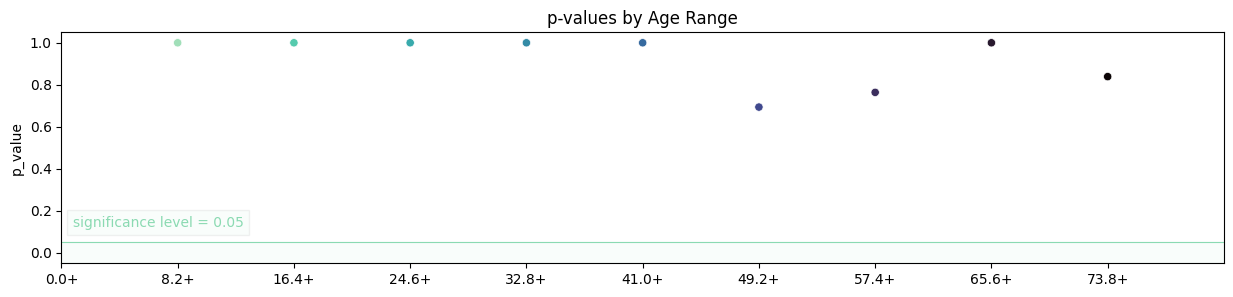

In [96]:
# Create p-values scatter plot
pScatterPlot(p_df, 'age_range', 'p-values by Age Range')

<b>→ As can be seen in the chart above, our initial speculation was correct. Since none of the p-values are even close to being significant, we can now confidently say that the difference between the stroke means of the 'formerly smoked' category' and the 'smokes' category were purely due to the age difference.</b>

<i>When controlling for the age range, the stroke status is independent of whether a person currently smokes or has smoked in the past. Merge categories.</i>

#### 3.2.2.3. Repeat with Never Smokers

For completeness' sake, we will now conduct another two hypothesis test, but this time for the "never_smoked" category with "formerly_smoked" category and "smokes" category separately, to see how they compare.

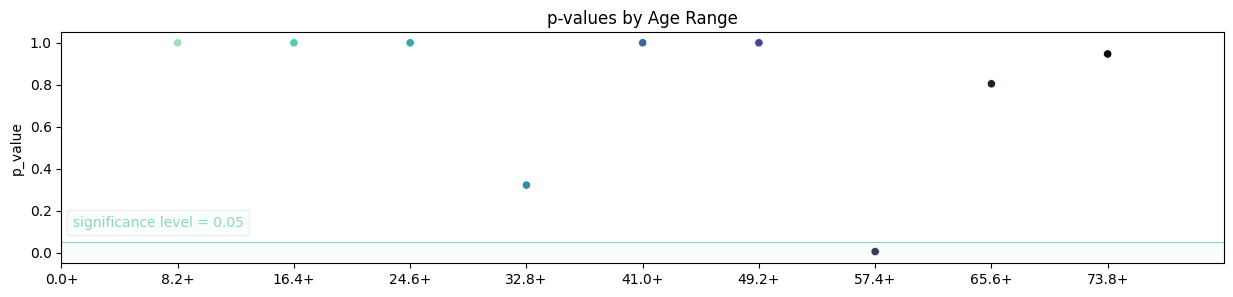

In [97]:
# "never smoked" vs. "formerly smoked"
smoked_dict = {'never smoked': 0, 'formerly smoked': 1}
smoked_df = analysis_df.copy()
smoked_df = smoked_df[~smoked_df.smoking_status.isna()]
smoked_df = smoked_df[smoked_df.smoking_status != 'smokes']
smoked_df['smoking_status'] = smoked_df.smoking_status.map(smoked_dict)
smoked_df = smoked_df[['age_range', 'smoking_status', 'stroke']]
control, p = chiSqTestWithControlVar(smoked_df, 'age_range', 'smoking_status', 'stroke')
p_df = pd.DataFrame({'age_range': control, 'p_value': p})
pScatterPlot(p_df, 'age_range', 'p-values by Age Range')

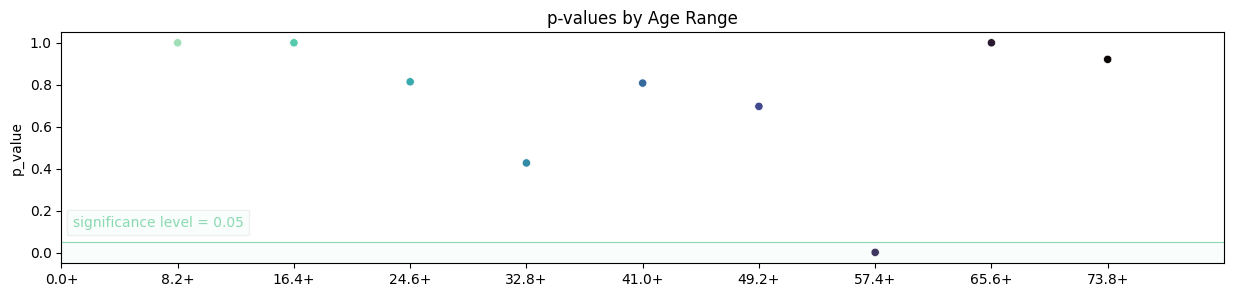

In [98]:
# "never smoked" vs. "smokes"
smoked_dict = {'never smoked': 0, 'smokes': 1}
smoked_df = analysis_df.copy()
smoked_df = smoked_df[~smoked_df.smoking_status.isna()]
smoked_df = smoked_df[smoked_df.smoking_status != 'formerly smoked']
smoked_df['smoking_status'] = smoked_df.smoking_status.map(smoked_dict)
smoked_df = smoked_df[['age_range', 'smoking_status', 'stroke']]
control, p = chiSqTestWithControlVar(smoked_df, 'age_range', 'smoking_status', 'stroke')
p_df = pd.DataFrame({'age_range': control, 'p_value': p})
pScatterPlot(p_df, 'age_range', 'p-values by Age Range')

<b>→ We can see that, at least at the 57.4+ age range, there is still a statistically significant difference between the stroke means of the "never smoked" category and the other two categories, i.e. the stroke status is dependent on the smoking status at this age range.</b>

#### 3.2.2.3. Convert "Smoking Status" to Boolean

Now we can convert the 'smoking status' variable to boolean by simply mapping the "never smoked" category to 0, and both other categories to 1, and then repeat the hypothesis test for our two new categories, while still controlling for age, to confirm that the stroke status is still dependent on the smoking status, at least for some age ranges.

In [99]:
smoking_dict = {'never smoked': 0, 'formerly smoked': 1, 'smokes': 1}
analysis_df['smoking_status'] = analysis_df.smoking_status.map(smoking_dict)
print(analysis_df.shape)
analysis_df.head()

(5110, 13)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1.0,1,65.6+
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,0.0,1,57.4+
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,0.0,1,73.8+
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1.0,1,41.0+
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0.0,1,73.8+


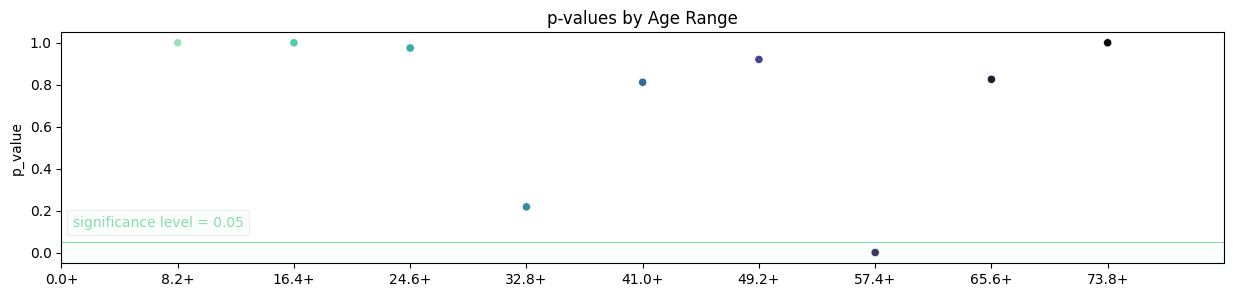

In [100]:
# "never smoked" vs. "has smoked"
smoked_df = analysis_df.copy()
smoked_df = smoked_df[~smoked_df.smoking_status.isna()]
smoked_df = smoked_df[['age_range', 'smoking_status', 'stroke']]
control, p = chiSqTestWithControlVar(smoked_df, 'age_range', 'smoking_status', 'stroke')
p_df = pd.DataFrame({'age_range': control, 'p_value': p})
pScatterPlot(p_df, 'age_range', 'p-values by Age Range')

<b>→ As we can see in the chart above, the stroke status is dependent on our new boolean smoking status, at least at the 57.4+ age range. For this reason, we will be keeping the 'smoking_status' variable.</b></b>

<i>When controlling for the age range, the stroke status is dependent on 'smoking_status' in certain age ranges. Keep column.</i>

### 3.2.3. Ever Married

We start again by creating a dataframe with:
- A column for the control variables, i.e. the 'age_range',
- A column for the independent variables, i.e. 'ever_married', and finally
- A column with the dependent variable, i.e. 'stroke'. 

In [101]:
indep_var = 'ever_married'

In [102]:
# Filter by the chosen variables
control_df = analysis_df.copy()
control_df = control_df[['age_range', indep_var, 'stroke']]
print(control_df.shape)
control_df.head()

(5110, 3)


,age_range,ever_married,stroke
0,65.6+,Yes,1
1,57.4+,Yes,1
2,73.8+,Yes,1
3,41.0+,Yes,1
4,73.8+,Yes,1


In [103]:
# Perform chi-squared tests
control, p = chiSqTestWithControlVar(control_df, 'age_range', indep_var, 'stroke')
p_df = pd.DataFrame({'age_range': control, 'p_value': p})
print(p_df.shape)
p_df.T

(10, 2)


,0,1,2,3,4,5,6,7,8,9
age_range,0.0+,8.2+,16.4+,24.6+,32.8+,41.0+,49.2+,57.4+,65.6+,73.8+
p_value,1.0,1.0,1.0,1.0,1.0,0.765413,0.948405,1.0,0.110228,0.449157


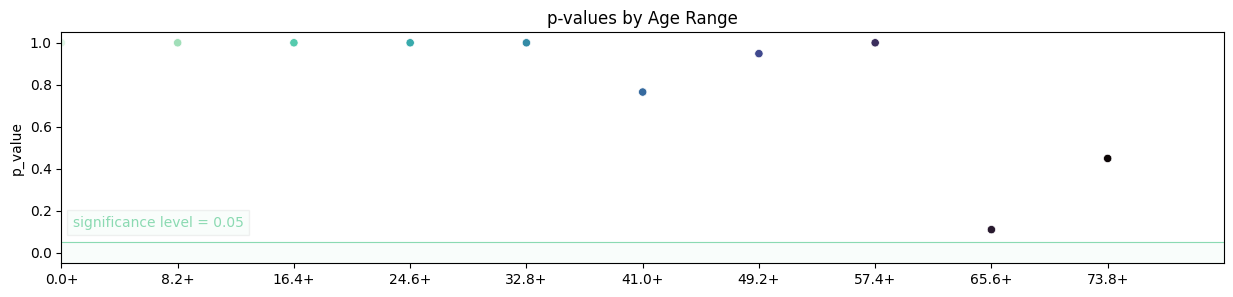

In [104]:
# Create p-values scatter plot
pScatterPlot(p_df, 'age_range', 'p-values by Age Range')

<b>→ As we can see from the chart above, as previously speculated, when controlling for the age range, the marriage status has no significant influence on the stroke status. For this reason, we can now safely remove the 'ever_married' column from the dataset.</b>

<i>When controlling for the age range, the stroke status is independent on 'ever_married'. Drop column.</i>

In [105]:
drop_columns.append('ever_married')

### 3.2.4. Hypertension

We start again by creating a dataframe with:
- A column for the control variables, i.e. the 'age_range',
- A column for the independent variables, i.e. 'hypertension', and finally
- A column with the dependent variable, i.e. 'stroke'. 

In [106]:
indep_var = 'hypertension'

In [107]:
# Filter by the chosen variables
control_df = analysis_df.copy()
control_df = control_df[['age_range', indep_var, 'stroke']]
print(control_df.shape)
control_df.head()

(5110, 3)


,age_range,hypertension,stroke
0,65.6+,0,1
1,57.4+,0,1
2,73.8+,0,1
3,41.0+,0,1
4,73.8+,1,1


In [108]:
# Perform chi-squared tests
control, p = chiSqTestWithControlVar(control_df, 'age_range', indep_var, 'stroke')
p_df = pd.DataFrame({'age_range': control, 'p_value': p})
print(p_df.shape)
p_df.T

(10, 2)


,0,1,2,3,4,5,6,7,8,9
age_range,0.0+,8.2+,16.4+,24.6+,32.8+,41.0+,49.2+,57.4+,65.6+,73.8+
p_value,1.0,1.0,1.0,1.0,0.609108,0.694816,0.000344,0.164511,0.007688,0.157118


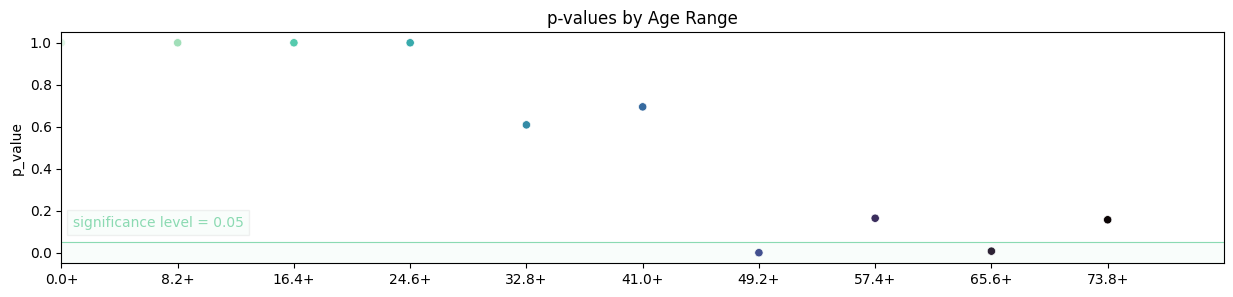

In [109]:
# Create p-values scatter plot
pScatterPlot(p_df, 'age_range', 'p-values by Age Range')

<b>→ As we can see from the chart above, when controlling for the age range, the hypertension status has a significant influence on the stroke status for certain age ranges. For this reason, we will be keeping the 'hypertension' variable.</b>

<i>When controlling for the age range, the stroke status is dependent on 'hypertension' in certain age ranges. Keep column.</i>

### 3.2.5. Heart Disease

We start again by creating a dataframe with:
- A column for the control variables, i.e. the 'age_range',
- A column for the independent variables, i.e. 'heart_disease', and finally
- A column with the dependent variable, i.e. 'stroke'. 

In [110]:
indep_var = 'heart_disease'

In [111]:
# Filter by the chosen variables
control_df = analysis_df.copy()
control_df = control_df[['age_range', indep_var, 'stroke']]
print(control_df.shape)
control_df.head()

(5110, 3)


,age_range,heart_disease,stroke
0,65.6+,1,1
1,57.4+,0,1
2,73.8+,1,1
3,41.0+,0,1
4,73.8+,0,1


In [112]:
# Perform chi-squared tests
control, p = chiSqTestWithControlVar(control_df, 'age_range', indep_var, 'stroke')
p_df = pd.DataFrame({'age_range': control, 'p_value': p})
print(p_df.shape)
p_df.T

(10, 2)


,0,1,2,3,4,5,6,7,8,9
age_range,0.0+,8.2+,16.4+,24.6+,32.8+,41.0+,49.2+,57.4+,65.6+,73.8+
p_value,1.0,1.0,1.0,1.0,1.0,1.0,0.630703,0.000152,0.269716,0.70227


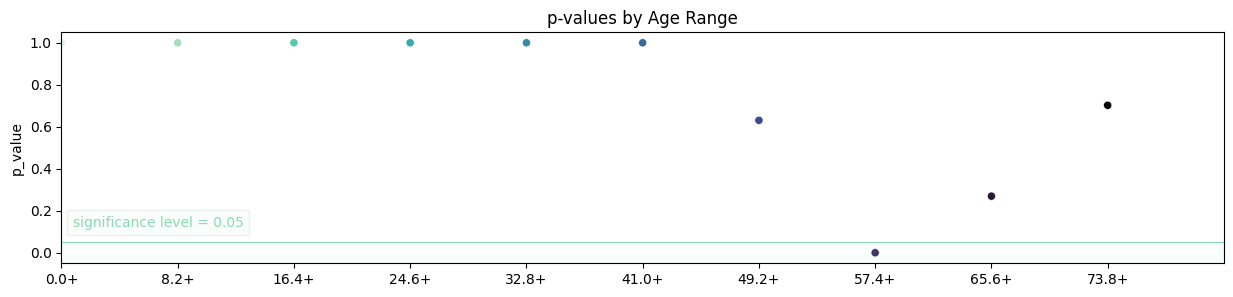

In [113]:
# Create p-values scatter plot
pScatterPlot(p_df, 'age_range', 'p-values by Age Range')

<b>→ Similarly to previous variables, when controlling for the age range, the heart disease status has no influence on the stroke status for most age ranges. However, for the 57.4+ years age range, the heart disease status still has a significant influence on the stroke status. For this reason, we will be keeping the 'heart_disease' variable.</b>

<i>When controlling for the age range, the stroke status is dependent on 'heart_disease' in certain age ranges. Keep column.</i>

# 4. Pre-processing

After carefully analysing each feature variable one by one, in both the "Exploratory Data Analysis"  and "Data Analysis" sections, we can now move on to the "Pre-processing" section.

<b>Objective:</b> The target for this section will be to prepare the data for our Machine Learning model. In other words, now that we know which variables we want to focus on, we can proceed with cleaning our data, filling missing values, dropping remaining surplus variables, and finally encoding our features for our model.

<b>Methodology:</b> In order to complete our objective:

- To clean our data:
    - We will start by calling our 'clean_data' list to see which columns need cleaning
    - Proceed to fix any issues we find
    
<b>
</b>

- To fill missing values:
    - We will start by calling our 'missing_data' list to see which variables have missing data
    - Conduct hypothesis tests to check which other variables have a significant influence on the variable with missing data
    - Use these variables to determine the missing values
    
<b>
</b>

- To drop columns:
    - We will start by calling our 'drop_columns' list to see which columns we have decided to drop
    - Drop those columns
  
<b>
</b>
  
- To encode features:
    - Use "one hot encoding" to convert any remaining categorical data to numerical data

In [114]:
process_df = analysis_df.copy()

## 4.1. Data Cleaning

Step one, of our pre-processing process will be to clean our data, i.e. to make sure there are no notable issues with said data.

In [115]:
# Show columns whose data needs cleaning
clean_data

['gender', 'work_type']

### 4.1.1. Gender

In [116]:
drop_columns

['gender', 'Residence_type', 'bmi', 'age_range', 'ever_married']

<b>→ Gender will be dropped, so there is no longer a need to clean the data.</b>

### 4.1.2. Work Type

During our previous exploration of the 'work_type' column, we noticed that the "Never_Worked" had a noticeably low number of entries. For this reason, we will be using this section to further investigate this issue, and determine whether we should remove the rows containing these entries.

In [117]:
process_df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

#### 4.1.2.1. Evaluate 'Never_worked' Category

In [118]:
# Filter by "never_worked" in "work_type" column
never_df = process_df[process_df.work_type == 'Never_worked']
print(never_df.shape)
never_df.head()

(22, 13)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,8.2+
603,61408,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,0.0,0,16.4+
886,13948,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,0.0,0,16.4+
939,16556,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,NaN,0,8.2+
959,56986,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,0.0,0,16.4+


In [119]:
never_df.drop(['id'], axis=1).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
count,22.000000,22.0,22.0,22.000000,22.000000,14.0,22.0
mean,16.181818,0.0,0.0,96.042727,25.545455,0.0,0.0
std,2.342899,0.0,0.0,28.697132,7.441757,0.0,0.0
min,13.000000,0.0,0.0,59.990000,14.600000,0.0,0.0
25%,14.250000,0.0,0.0,78.457500,20.975000,0.0,0.0
50%,16.000000,0.0,0.0,86.020000,23.150000,0.0,0.0
75%,17.000000,0.0,0.0,112.807500,28.350000,0.0,0.0
max,23.000000,0.0,0.0,161.280000,44.900000,0.0,0.0


<b>→ As we observed earlier, in addition to having low number of values, the "Never_worked" category also has a stroke mean of 0, meaning all people listed in the dataset as having "Never_worked" have not had a stroke.</b>

In addition we can also see from the table above that their ages go as low as 13, which seems odd, considering there is a separate "children" category for the 'work_type' column. This will be investigated in the next section.

#### 4.1.2.2. Investigate Age Range for 'Work_type' Categories

Here we are simply creating a custom chart to visualize the age range for all 'work_type' categories.

In [120]:
# Prepare data to create an age range bar chart
work_index = process_df.work_type.value_counts().index
age_ranges = []

for i in work_index:
    age_ranges.append([min(df.age[df.work_type==i]), max(df.age[df.work_type==i])])

agerange_df = pd.DataFrame(age_ranges, index=df.work_type.value_counts().index, columns=['lower', 'upper'])
agerange_df['difference'] = agerange_df.upper - agerange_df.lower
agerange_df = agerange_df.sort_values('lower')
agerange_df.head()

,lower,upper,difference
work_type,,,
children,0.08,16.0,15.92
Self-employed,7.00,82.0,75.00
Private,8.00,82.0,74.00
Never_worked,13.00,23.0,10.00
Govt_job,14.00,82.0,68.00


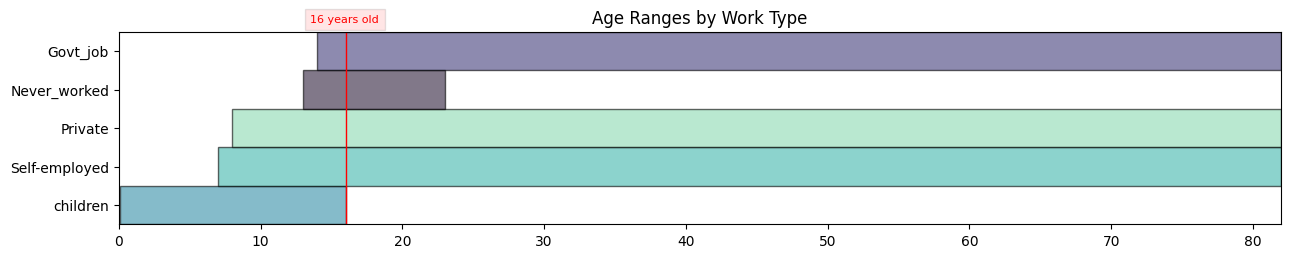

In [121]:
# Create age range bar chart
mako_re = [mako[2], mako[1], mako[0], mako[5], mako[4]]

fig, ax = plt.subplots(figsize=(15,2.5))
ax.barh(y=agerange_df.index, width=agerange_df.difference, height=1, left=agerange_df.lower, color=mako_re, edgecolor='black', alpha=0.6)
ax.axvline(x=16, color='red', linewidth=1)
ax.text(x=13.5, y=4.75, s='16 years old', color='red', fontsize=8, bbox=dict(facecolor='red', alpha=0.1))
plt.title('Age Ranges by Work Type')
plt.xlim(0,82)
plt.ylim(-0.5,4.5)
plt.show()

<b>→ As we had already suspected from the previous table, there seems to be an overlap between the "children" category and not only the "Never_worked" category, but also all other categories. Before proceeding, we now have to redefine our 'work_type' categories, in order to avoid overlaps.</b>

#### 4.1.2.3.  Determine Working Age

In order to be able to redefine our 'work_type' categories, we will start by determining the "working age", i.e. the age at which we will no longer consider non-working people to be "children".

In [122]:
# Sort work type by value counts to have consistent colormap
sorted_df = df.copy()
sorted_df['work_type'] = pd.Categorical(sorted_df['work_type'], df['work_type'].value_counts().index)
sorted_df = sorted_df.sort_values('work_type')

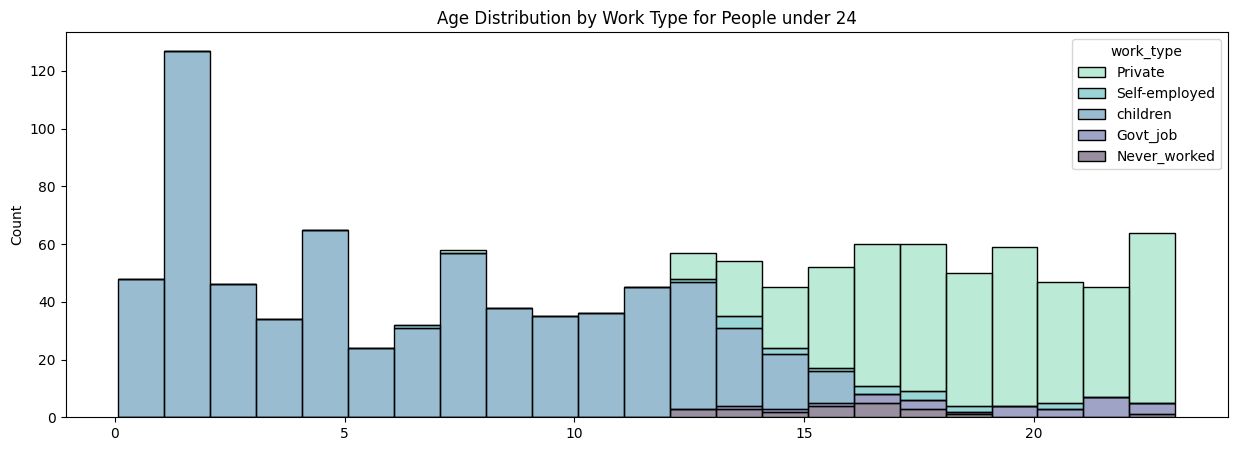

In [123]:
# Create age historgram by work type for people under 24
young_df = sorted_df[sorted_df.age < 24]

fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=young_df, x='age', hue='work_type', binwidth=1, multiple='stack', fill=True, palette='mako_r', alpha=0.5, ax=ax)
ax.set(xlabel=None)
plt.title('Age Distribution by Work Type for People under 24')
plt.show()

<b>→ As can be seen in the chart above, until the age of 12, the vast majority of people in the dataset are considered to be children (there are a few exceptions that are hard to see at ages 7 and 8). However, until the age of 14 or 15, "children" seem to still represent the majority of types of work. For this reason, we will determine the "working age" to be the last age at which "children" represent the majority.</b>

In [124]:
# Create two lists two distinguish between working and non-working people
working = ['Private', 'Self-employed', 'Govt_job']
not_working = ['children', 'Never_worked']

In [125]:
# Find the age at which the number of working people exceeds the number of non-working people
for i in range(24):
    working_count = young_df.age[young_df.work_type.isin(working) & (young_df.age == i)].count()
    notwork_count = young_df.age[young_df.work_type.isin(not_working) & (young_df.age == i)].count()
    
    if working_count > notwork_count:
        print('\033[1m' + 'Number of working people exceeds number of non-working people at age:' + '\033[0m', i)
        break

Number of working people exceeds number of non-working people at age: 15


<b>→ Therefore we have determined the "working age" to be 15, and hence we will now reassign all people under the age of 15 to the "children" category, as well as removing non-working people above the age of 15.</b>

#### 4.1.2.4. Reassign Working Children under 15 to Children

Here we will be looking for the children under 15 that have been listed as working, and reassigning their 'work_type' to "children".

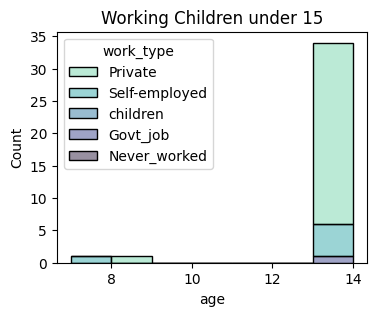

In [126]:
# Create age histogram for working children under 15
workchild_df = sorted_df[sorted_df.work_type.isin(working) & (sorted_df.age < 15)]

fig, ax = plt.subplots(figsize=(4,3))
sns.histplot(data=workchild_df, x='age', hue='work_type', binwidth=1, multiple='stack', fill=True, palette='mako_r', alpha=0.5, ax=ax)
plt.title('Working Children under 15')
plt.show()

In [127]:
# Show working children under 15
print(workchild_df.shape)
workchild_df.sort_values('age').head()

(36, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
410,54975,Male,7.0,0,0,No,Self-employed,Rural,64.06,18.9,NaN,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3532,29613,Female,13.0,0,0,No,Private,Rural,73.76,26.7,NaN,0
2112,9199,Male,13.0,0,0,No,Self-employed,Urban,74.19,31.1,formerly smoked,0
3964,38132,Female,13.0,0,0,No,Private,Rural,172.27,16.6,never smoked,0


In [128]:
# Reassign work type of working children under 15 to "children"
process_df.loc[workchild_df.index, 'work_type'] = 'children'

<b>→ We have now succesfully reassigned the 36 working children that had not been listed as "children".</b>

#### 4.1.2.5. Reassign Non-Working People Under 15 to Children:

Similarly to before, here we will be looking for the children under 15 that have been listed as "Never_worked", and reassigning their 'work_type' to "children".

In [129]:
# Filter by the remaining people that are listed as having never worked
never15_df = df[(df.work_type == 'Never_worked') & (df.age < 15)]
print(never15_df.shape)
never15_df.sort_values('age').head(6)

(6, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
939,16556,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,NaN,0
1789,13862,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
4410,34900,Male,13.0,0,0,No,Never_worked,Urban,85.08,14.6,NaN,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
2346,61219,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
3196,57274,Male,14.0,0,0,No,Never_worked,Urban,137.91,41.8,never smoked,0


In [130]:
# Reassign work type of working children under 15 to "children"
process_df.loc[never15_df.index, 'work_type'] = 'children'

<b>→ We have now succesfully reassigned the 6 children that had been listed as having "Never_worked".</b>

#### 4.1.2.6. Remove Non-Working People Over 15

Finally, here we will proceed to find the people above the age of 15 whose 'work_type' has been listed as "children" or "Never_worked".

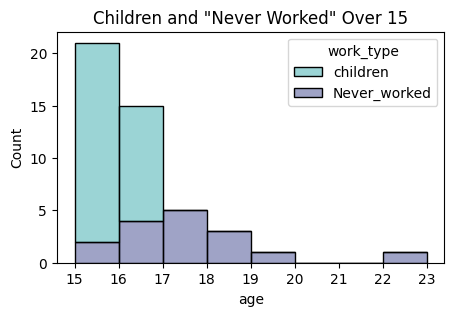

In [131]:
# Create age distribution histogram for "children" and "never worked"
notwork_df = df[df.work_type.isin(not_working) & (df.age >= 15)]

fig, ax = plt.subplots(figsize=(5,3))
sns.histplot(data=notwork_df, x='age', hue='work_type', binwidth=1, multiple='stack', fill=True, palette='mako_r', alpha=0.5, ax=ax)
plt.title('Children and "Never Worked" Over 15')
plt.show()

In [132]:
# Filter by people over 15 that are as listed as not working
print(notwork_df.shape)
notwork_df.head()

(46, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
292,44338,Female,16.0,0,0,No,children,Rural,110.63,19.5,NaN,0
461,34376,Female,16.0,0,0,No,children,Rural,113.47,19.5,NaN,0
498,21058,Female,15.0,0,0,No,children,Rural,114.53,29.1,NaN,0
550,68241,Female,15.0,0,0,No,children,Urban,126.96,28.7,NaN,0
598,31090,Male,15.0,0,0,No,children,Rural,205.50,24.2,never smoked,0


In [133]:
print('\033[1m' + 'Overall percentage of non-working people over 15:' + '\033[0m', '{}%'.format(round(len(notwork_df)/len(df)*100,1)))

Overall percentage of non-working people over 15: 0.9%


In [134]:
print('\033[1m' + 'Stroke mean of non-working people over 15:' + '\033[0m', notwork_df.stroke.mean())

Stroke mean of non-working people over 15: 0.0


<b>→ As can been seen above, not only have we found the 46 people over 15 not listed as working, but we have shown that they only represent a very small percentage of the total and have a stroke mean of 0, meaning they are unlikely to be representative, and should hence be removed.</b>

<i>Represent insignificant percentage of total. Can be dropped.</i>

In [135]:
# Remove people over 15 that are as listed as not working
process_df = process_df[~process_df.index.isin(notwork_df.index)]

#### 4.1.2.7. Check Data Cleaning

Here we will simply take a closer look at our new 'work_type' data and how it compares to the raw version.

In [136]:
raw_df.shape

(5110, 12)

In [137]:
process_df.shape

(5064, 13)

In [138]:
raw_df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [139]:
process_df.work_type.value_counts()

work_type
Private          2896
Self-employed     813
children          699
Govt_job          656
Name: count, dtype: int64

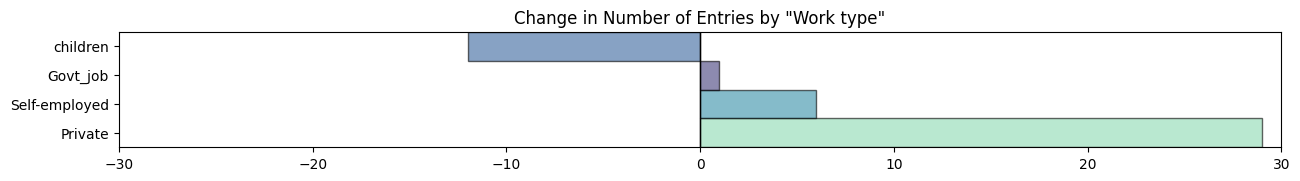

In [140]:
# Create "change in number of entries" bar chart
mako_re = [mako[0], mako[2], mako[4], mako[3]]
change_df = (raw_df.work_type.value_counts()-process_df.work_type.value_counts()).to_frame('work_count')
change_df = change_df[~change_df.work_count.isna()].sort_values('work_count', ascending=False)

fig, ax = plt.subplots(figsize=(15,1.5))
ax.barh(y=change_df.index, width=change_df.work_count, height=1, edgecolor='black', color=mako_re, alpha=0.6)
ax.axvline(x=0, color='black', linewidth=1)
plt.title('Change in Number of Entries by "Work type"')
plt.xlim(-30,30)
plt.ylim(-0.5,3.5)
plt.show()

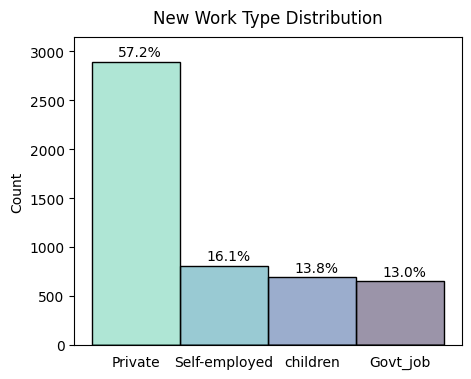

In [141]:
# Create new work type histogram
histogram(process_df, 'work_type', 'New Work Type Distribution', (5,4))

<b>→ As we can see in the chart above, our 'work_type' variable is still fairly unbalanced, but at least we no longer have a category with next to no values.</b>

## 4.2. Missing Data

After cleaning up our data, we can now proceed to deal with the missing values in our dataset.

In [142]:
missing_data

['bmi', 'smoking_status']

### 4.2.1. BMI

In [143]:
drop_columns

['gender', 'Residence_type', 'bmi', 'age_range', 'ever_married']

<b>→ BMI column will be dropped, so missing data is no longer relevant.</b>

### 4.2.2. Smoking Status

Since the 'bmi' column is no longer relevant, the only column that contains missing values is the 'smoking status' column.

In [144]:
# Number of NaN entries in the 'smoking_status' column
process_df.smoking_status.isna().sum()

1518

<b>→ To deal with missing data, we need to make use of available data.</b>

In [145]:
# Filter 'smoking_df' by values in the "smoking_status" column that are not NaN
nona_df = process_df[~process_df.smoking_status.isna()]
print(nona_df.shape)
nona_df.head()

(3546, 13)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1.0,1,65.6+
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,0.0,1,57.4+
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,0.0,1,73.8+
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1.0,1,41.0+
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0.0,1,73.8+


<b>→ While we have 1518 rows that are missing data in their 'smoking status' column, we have even more rows (3546) that are not missing any data. In other words, we can use the rows that are not missing any data to make an educated guess on the likely value of the rows with missing data.</b>

#### 4.2.2.1. Hypothesis Testing

Before we start making educated guesses, we need to first determine which of our available variables have a statistically significant influence on the smoking status. In order to achieve this, we will be again conducting hypothesis tests, but this time, using the smoking status as our dependent variable.

In [146]:
# Filter and re-order 'nona_df'
nona_df = nona_df[['gender', 'work_type', 'Residence_type', 'ever_married', 'hypertension', 'heart_disease', 'age_range', 'smoking_status']]
print(nona_df.shape)
nona_df.head()

(3546, 8)


,gender,work_type,Residence_type,ever_married,hypertension,heart_disease,age_range,smoking_status
0,Male,Private,Urban,Yes,0,1,65.6+,1.0
1,Female,Self-employed,Rural,Yes,0,0,57.4+,0.0
2,Male,Private,Rural,Yes,0,1,73.8+,0.0
3,Female,Private,Urban,Yes,0,0,41.0+,1.0
4,Female,Self-employed,Rural,Yes,1,0,73.8+,0.0


In [147]:
significance_level = 0.05

In [148]:
def multiChiSqTest(df):
    """
    Perform multiple separate Chi-squared tests by using the last column in a dataframe as the dependent variable, and every other
    column as the independent variable. Returns dataframe with the p-values for each independent variable, as well as a list of
    the independent variables that are determined to have a significant influence on the dependent variable.
    """
    length = len(df.columns)
    p_df = pd.DataFrame()
    
    variables = []
        
    for i in df.columns[0:length-1]:
    
        contigency = pd.crosstab(df[i], df.smoking_status)
        stat, p, dof, exp_freq = stats.chi2_contingency(contigency)     
        temp_df = pd.DataFrame.from_dict({i: p}, orient='index', columns=['p_value'])
        p_df = pd.concat((p_df, temp_df))
        
        if p <= significance_level:
            variables.append(i)
            
    return p_df, variables

In [149]:
p_df, variables = multiChiSqTest(nona_df)
p_df.head(8)

,p_value
gender,2.000295e-08
work_type,9.096617e-05
Residence_type,2.994760e-02
ever_married,4.700296e-08
hypertension,7.548801e-01
heart_disease,4.047120e-05
age_range,2.282580e-17


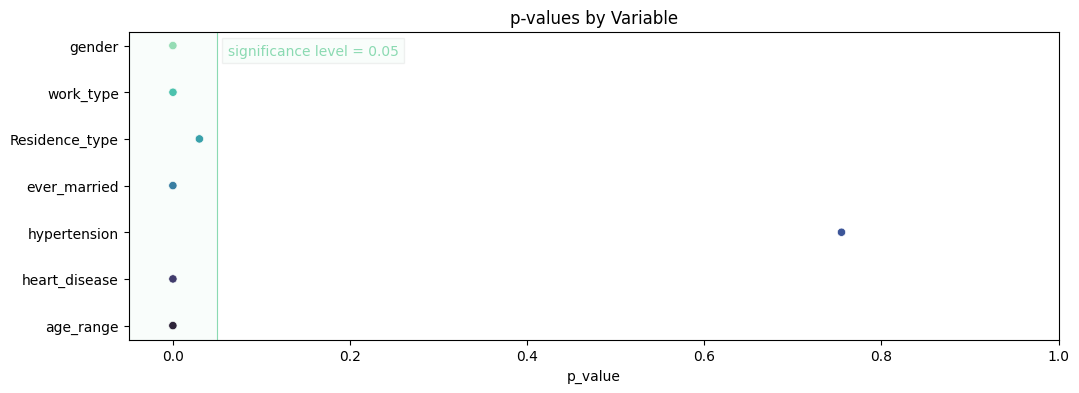

In [150]:
# Create p-values scatter plot
length = len(p_df.index)

fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(x=p_df.p_value, y=p_df.index, hue=p_df.index, palette='mako_r', legend=False, ax=ax)
ax.axvline(x=significance_level, color=mako[0], linewidth=0.8)
ax.axvspan(-0.05, significance_level, color=mako[0], alpha=0.05)
ax.text(0.062, 0.2, 'significance level = ' + str(significance_level), color=mako[0], bbox=dict(facecolor=mako[0], alpha=0.05))
plt.title('p-values by Variable')
plt.xlim(-0.05,1)
plt.show()

<b>→ As can be seen in the chart, the 'smoking_status' appears to be dependent on all availables variables, except 'hypertension'.</b>

In [151]:
# Variables that the "smoking_status" is dependent on
variables

['gender',
 'work_type',
 'Residence_type',
 'ever_married',
 'heart_disease',
 'age_range']

#### 4.2.2.2. Filling Data

Even though, we have already converted the 'smoking_status' to boolean, it is still essentially categorical data, which means we cannot simply group by the relevant variables and then find the mean.

For this reason, we will start by separating our 'smoking_status' in to two new columns, based on their values, one for 0s and one for 1s. This will allow us to sum up these two new columns when we group our dataframe by the relevant variables. In other words, we will be getting the tally of 0s and 1s for each group.

This, in turn, will allow us to additionally get the ratio of 1s for each group, i.e. if a group has three 0s and two 1s, the ratio will be 0.4. The reason we are interested in this ratio is that when we are actually filling the missing values, since we cannot use the mean of our 'smoking_status', we will instead be using the distribution of our 'smoking_status'.

In [152]:
# Separate 'smoking_status' in to two new columns
dummy_df = pd.get_dummies(nona_df, columns = ['smoking_status'], prefix = 'ss', dtype=int)
print(dummy_df.shape)
dummy_df.head()

(3546, 9)


,gender,work_type,Residence_type,ever_married,hypertension,heart_disease,age_range,ss_0.0,ss_1.0
0,Male,Private,Urban,Yes,0,1,65.6+,0,1
1,Female,Self-employed,Rural,Yes,0,0,57.4+,1,0
2,Male,Private,Rural,Yes,0,1,73.8+,1,0
3,Female,Private,Urban,Yes,0,0,41.0+,0,1
4,Female,Self-employed,Rural,Yes,1,0,73.8+,1,0


In [153]:
# Group by variables, get sum, and get ratio
group_df = dummy_df[variables + ['ss_0.0', 'ss_1.0']].groupby(variables).sum()
group_df['smoked_ratio'] = group_df['ss_1.0'] / (group_df['ss_0.0'] + group_df['ss_1.0'])
print(group_df.shape)
group_df.T

(960, 3)


gender           Female                                                     \
work_type      Govt_job                                                      
Residence_type    Rural                                                      
ever_married         No                                                      
heart_disease         0                                                      
age_range          0.0+ 8.2+     16.4+     24.6+     32.8+     41.0+ 49.2+   
ss_0.0              0.0  0.0  5.000000  3.000000  5.000000  2.000000   1.0   
ss_1.0              0.0  0.0  1.000000  4.000000  1.000000  1.000000   0.0   
smoked_ratio        NaN  NaN  0.166667  0.571429  0.166667  0.333333   0.0   

gender                                ...    Other                         \
work_type                             ... children                          
Residence_type                        ...    Urban                          
ever_married                          ...      Yes                          
heart_disease                         ...        1                          
age_range          57.4+ 65.6+ 73.8+  ...     0.0+ 8.2+ 16.4+ 24.6+ 32.8+   
ss_0.0          2.000000   0.0   1.0  ...      0.0  0.0   0.0   0.0   0.0   
ss_1.0          1.000000   0.0   0.0  ...      0.0  0.0   0.0   0.0   0.0   
smoked_ratio    0.333333   NaN   0.0  ...      NaN  NaN   NaN   NaN   NaN   

gender                                        
work_type                                     
Residence_type                                
ever_married                                  
heart_disease                                 
age_range      41.0+ 49.2+ 57.4+ 65.6+ 73.8+  
ss_0.0           0.0   0.0   0.0   0.0   0.0  
ss_1.0           0.0   0.0   0.0   0.0   0.0  
smoked_ratio     NaN   NaN   NaN   NaN   NaN  

[3 rows x 960 columns]

<b>→ From the table above, we can see that:</b>
    
For each newly created group there are a certain number of 0s and 1s (i.e. whether the person in question has smoked or not).

In other words, for each group, we have a distribution of 0s and 1s based on the rows that have 'smoking_status' data. Therefore, we can use this distribution to get the ratio of 1s (or 0s) and use this ratio as a probability when assigning either 0s or 1s to our rows with missing data, by using the built-in "random.choice" numpy function.

For example, we can see above that 16.7% of the values in the group represented in the fourth column (16.4+) are 1s. Therefore, when our custom function below finds a row with missing data that matches this group (i.e. it has the same gender, age_range, etc.), it will with 16.7% probability assign a 1 to this row and a 0 with 83.3% probability.

This way the new distribution of 1s and 0s (after with fill the missing data) should remain fairly close to the original distribution of 1s and 0s.

In [154]:
def replaceNaN(df, group_df, na_column: str, ratio_column: str):
    """
    Replace NaN values from a selected column within a dataframe with 1s and 0s based on the probability from the 'ratio_column' in 'group_df'.
    """

    na_df = df[df[na_column].isna()] #Filter 'df' by NaN values in the "na_column"

    counter = 0
    
    var0 = group_df.index.names[0]
    var1 = group_df.index.names[1]
    var2 = group_df.index.names[2]
    var3 = group_df.index.names[3]
    var4 = group_df.index.names[4]
    var5 = group_df.index.names[5]

    for val0, val1, val2, val3, val4, val5 in group_df.index:
        
            counter = counter + 1
            
            filter_df = na_df[(na_df[var0]==val0) & (na_df[var1]==val1) & (na_df[var2]==val2) & (na_df[var3]==val3) & (na_df[var4]==val4) & (na_df[var5]==val5)]
            filter_index = filter_df.index
            
            if np.isnan(group_df[ratio_column][counter-1]):
                
                if val5 in ['0.0+']:
                    
                    df.loc[filter_index, na_column] = 0
                    
                else:
                    
                    df.loc[filter_index, na_column] = np.nan
                
            else:
                
                df.loc[filter_index, na_column] = np.random.choice([0,1], p=[1-group_df[ratio_column][counter-1], group_df[ratio_column][counter-1]])

In [155]:
# Replace null values in 'smoking_status' column from 'process_df'
replaceNaN(process_df, group_df, 'smoking_status', 'smoked_ratio')

<b>→ Now the missing values should have been mostly filled, but to make sure, we can filter by null values.</b>

In [156]:
# Filter by null values
na_df = process_df[process_df.smoking_status.isna()]
print(na_df.shape)
na_df.head(18)

(6, 13)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1,49.2+
1527,25559,Female,66.0,0,1,Yes,Govt_job,Rural,76.11,37.0,NaN,0,65.6+
1670,34720,Male,45.0,0,1,Yes,Private,Rural,93.77,NaN,NaN,0,41.0+
3054,16550,Female,69.0,0,1,No,Govt_job,Urban,202.38,34.6,NaN,0,65.6+
3358,14063,Male,81.0,0,1,No,Self-employed,Rural,95.49,29.4,NaN,0,73.8+
4703,8037,Male,44.0,0,1,No,Govt_job,Urban,94.62,34.4,NaN,0,41.0+


<b>→ As we can see from the table above, of the originally 1518 missing values, only 6 have not been filled, meaning our available data is not sufficient to determine the 'smoking_status' of these rows (at least based on our chosen independent variables). However, considering these only represent a very small percentage of the overall dataset, we will simply remove them.</b>

<i>Represent insignificant percentage of total. Can be dropped.</i>

In [157]:
# Remove remaining rows with null values
process_df = process_df[~process_df.index.isin(na_df.index)]

In [158]:
# Convert 'smoking_status' values to int, and show ensuing dataframe
process_df['smoking_status'] = process_df.smoking_status.astype(int)
print(process_df.shape)
process_df.head()

(5058, 13)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1,65.6+
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,0,1,57.4+
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1,73.8+
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,1,41.0+
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1,73.8+


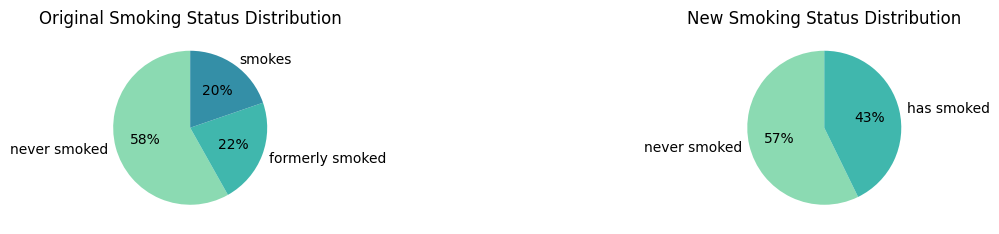

In [159]:
# Create two pie charts, one showing the original 'smoking_status' distribution, and another showing the current distribution
original_df = df.copy()
original_df.loc[original_df.smoking_status[df.age < 8.2].index, 'smoking_status'] = 'never smoked' # filling null values for children under 8
original_data = original_df.smoking_status.value_counts()
new_df = process_df.copy()
new_df['smoking_status'] = new_df.smoking_status.map({0: 'never smoked', 1: 'has smoked'})
new_data = new_df.smoking_status.value_counts()

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,2.5))
ax1.pie(original_data.values, labels=original_data.index, colors=mako, autopct='%.0f%%', startangle=90)
ax2.pie(new_data.values, labels=new_data.index, colors=mako, autopct='%.0f%%', startangle=90)
ax1.set_title('Original Smoking Status Distribution')
ax2.set_title('New Smoking Status Distribution')
plt.show()

<b>→ As we can see from the charts above, our replacement method pretty much perfectly kept the original distribution of the 'smoking_status' column, while filling the vast majority of null values.</b>

## 4.3. Drop Columns

Here we will finally drop the columns that we have been keeping track of in our 'drop_columns' list.

In [160]:
drop_columns

['gender', 'Residence_type', 'bmi', 'age_range', 'ever_married']

In [161]:
process_df = process_df.drop(drop_columns + ['id'], axis=1)
print(process_df.shape)
process_df.head()

(5058, 7)


,age,hypertension,heart_disease,work_type,avg_glucose_level,smoking_status,stroke
0,67.0,0,1,Private,228.69,1,1
1,61.0,0,0,Self-employed,202.21,0,1
2,80.0,0,1,Private,105.92,0,1
3,49.0,0,0,Private,171.23,1,1
4,79.0,1,0,Self-employed,174.12,0,1


## 4.4. Feature Encoding

The final step ouf our "Pre-processing" section will be to turn our categorical features into numerical data, in order to make them readable to our model.

### 4.4.1. One Hot Encoding

Seeing as we have already converted our 'smoking_status' variable to boolean, the only non-numeric variable is 'work_type'. However, since the 'work_type' variable has more than one category, we cannot simply convert it to a boolean, for this reason we will use one hot encoding to create new columns for each category, containing only 1s or 0s depending on whether the row in question originally contained the category or not. 

In [162]:
process_df = pd.get_dummies(process_df, columns = ['work_type'], prefix = 'wt', dtype=int)
print(process_df.shape)
process_df.head()

(5058, 10)


,age,hypertension,heart_disease,avg_glucose_level,smoking_status,stroke,wt_Govt_job,wt_Private,wt_Self-employed,wt_children
0,67.0,0,1,228.69,1,1,0,1,0,0
1,61.0,0,0,202.21,0,1,0,0,1,0
2,80.0,0,1,105.92,0,1,0,1,0,0
3,49.0,0,0,171.23,1,1,0,1,0,0
4,79.0,1,0,174.12,0,1,0,0,1,0


# 5. Machine Learning

After meticulously analysing, cleaning, and preparing our data, we can finally move on the final section, the actual training of our Machine Learning model.    
    
<b>Objective:</b> The objective of this section will be to train several Machine Learning models using our dataset, and then evaluate their performance.

<b>Methodology:</b> In order to complete our objective, we will follow at least two steps:

- Dataset Splitting:
    - Before we can start modelling, we need to first split our dataset into four:
        - A training set with all feature variables
        - A training set with the target variable
        - A testing set with all feature variables
        - A testing set with the target variable
    - The training sets will be used to actually train our model
    - The testing sets will be used to assess their performance
     
<b>
</b>
    
- Model Training:
    - The main event of this project, here we will finally train selected Machine Learning models, specifically designed for classification problems, on our training set, including:
        - Logistic Regression
        - K-Nearest Neighbors
        - Decision Tree
        - Random Forest
    - And then assess their respective performance using metrics, such as:
        - Accuracy
        - Precision
        - Recall
        - f1-score

In [163]:
model_df = process_df.copy()

## 5.1. Dataset Splitting

### 5.1.1. Train/Test Split

Before we get to the actual modelling, we need to first split our dataset into two: 
    
- A training set, and
- A testing set

This will allow us to train our model on the training set, and then evaluate its performance using the testing set.

For the purpose of this Machine Learning project, we will be using a ratio of 4:1 for the training set and the testing set, and to ensure that both sets have the same distribution of 1s and 0s in the 'stroke' column, as our original dataset, we will use the "stratify" parameter of the scikit-learn 'train_test_split' function. 

In [164]:
# Split dataset in to a training set and a testing set
train_df, test_df = train_test_split(model_df, train_size=0.8, stratify=model_df.stroke)

In [165]:
print(train_df.shape)
train_df.head()

(4046, 10)


,age,hypertension,heart_disease,avg_glucose_level,smoking_status,stroke,wt_Govt_job,wt_Private,wt_Self-employed,wt_children
477,61.0,0,0,184.15,1,0,1,0,0,0
3107,8.0,0,0,96.43,0,0,0,0,0,1
2512,58.0,0,0,127.32,1,0,0,1,0,0
2259,18.0,0,0,152.87,0,0,0,1,0,0
4286,3.0,0,0,194.75,0,0,0,0,0,1


In [166]:
print(test_df.shape)
test_df.head()

(1012, 10)


,age,hypertension,heart_disease,avg_glucose_level,smoking_status,stroke,wt_Govt_job,wt_Private,wt_Self-employed,wt_children
569,32.0,0,0,65.30,0,0,0,0,1,0
4181,27.0,0,0,57.46,1,0,0,1,0,0
803,52.0,0,0,79.80,1,0,0,1,0,0
2180,57.0,0,0,189.44,0,0,0,1,0,0
4500,60.0,0,0,227.23,1,0,0,0,1,0


In [167]:
model_df.stroke.mean()

0.049031237643337285

In [168]:
train_df.stroke.mean()

0.04893722194760257

In [169]:
test_df.stroke.mean()

0.04940711462450593

<b>→ As we can see above, we have succefully split our dataset into a training set and a testing set, and were also able to confirm that both new sets, and our original dataset, all have very similar stroke means, i.e. they all have a very similar distribution of 1s and 0s in their 'stroke' column.</b>

### 5.1.2. Features/Target Split

Despite already having split our original dataset into two new datasets, the splitting does not stop there. Now we need to split both new sets again, leaving us with a total of four different datasets:

- <b>Training set:</b>
    - X_train - The feature variables of our training set.
    - y_train - The target variable of our training set.
     
<b>
</b>
    
        → Will be used to train our models.
    
<b>
</b>

- <b>Testing set:</b>
    - X_test - The feature variables of our testing set.
    - y_test - The target variable of our testing set.
    
<b>
</b>
    
        → Will be used to evaluate the performance of our models.

#### 5.2.1. Split Training Set

Here we will split the training set by feature variables and the target variable.

In [170]:
train_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'smoking_status', 'stroke', 'wt_Govt_job', 'wt_Private',
       'wt_Self-employed', 'wt_children'],
      dtype='object')

In [171]:
# Split training set into feature variables (X) and the target variable (y)
X_train = train_df.drop(['stroke'], axis=1)
y_train = train_df['stroke']

In [172]:
print(X_train.shape)
X_train.head()

(4046, 9)


,age,hypertension,heart_disease,avg_glucose_level,smoking_status,wt_Govt_job,wt_Private,wt_Self-employed,wt_children
477,61.0,0,0,184.15,1,1,0,0,0
3107,8.0,0,0,96.43,0,0,0,0,1
2512,58.0,0,0,127.32,1,0,1,0,0
2259,18.0,0,0,152.87,0,0,1,0,0
4286,3.0,0,0,194.75,0,0,0,0,1


In [173]:
print(y_train.shape)
y_train.head()

(4046,)


477     0
3107    0
2512    0
2259    0
4286    0
Name: stroke, dtype: int64

#### 5.2.2. Split Testing Set

Here we will split the testing set by feature variables and the target variable.

In [174]:
test_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'smoking_status', 'stroke', 'wt_Govt_job', 'wt_Private',
       'wt_Self-employed', 'wt_children'],
      dtype='object')

In [175]:
# Split testing set into feature variables (X) and the target variable (y)
X_test = test_df.drop(['stroke'], axis=1)
y_test = test_df['stroke']

In [176]:
print(X_test.shape)
X_test.head()

(1012, 9)


,age,hypertension,heart_disease,avg_glucose_level,smoking_status,wt_Govt_job,wt_Private,wt_Self-employed,wt_children
569,32.0,0,0,65.30,0,0,0,1,0
4181,27.0,0,0,57.46,1,0,1,0,0
803,52.0,0,0,79.80,1,0,1,0,0
2180,57.0,0,0,189.44,0,0,1,0,0
4500,60.0,0,0,227.23,1,0,0,1,0


In [177]:
print(y_test.shape)
y_test.head()

(1012,)


569     0
4181    0
803     0
2180    0
4500    0
Name: stroke, dtype: int64

## 5.2. Model Training

So, after successfully splitting our dataset, we can now finally start actually building our Machine Learning models, and evaluating their performance.

In [178]:
def modelReport(mlm, X_train, y_train, X_test, y_test):
    """
    Returns classification report for selected model and training/testing sets.
    """
    
    model = mlm
    model.fit(X=X_train, y=y_train)
    
    predict_y_test = model.predict(X_test)
    
    report = classification_report(y_true=y_test, y_pred=predict_y_test, zero_division=0.0)
    
    return report

### 5.2.1. Linear Models

Before building more complex Machine Learning models, we will start by trying a linear model, Logistic Regression. This will allow us to check if our data can be fitted to a linear model.

#### 5.2.1.1. Logistic Regression

In [179]:
print(modelReport(LogisticRegression(random_state=0, max_iter=1000), X_train, y_train, X_test, y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       962
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1012
   macro avg       0.48      0.50      0.49      1012
weighted avg       0.90      0.95      0.93      1012



<b>→ We can see from the table above that:</b>
- Even though our Logistic Regression model has a very high accuracy score (95%), it is fairly meaningless, as approximately 95% of our stroke data was 0s.
- In fact, we can see from the precision score of 0%, that our model did indeed not guess 1s a single time, resulting in the recall and f1-score also being 0%.
- Therefore, it seems that either the our data cannot be fitted to a linear model, or that there my another issue, that we may to address before trying again. For example, during earlier sections, we noticed that the stroke data in particular was very unbalanced, so that may be what is causing problems.

### 5.2.2. Non-Linear Models

Since our linear model was not very fruitful, we will now retry with non-linear models.

#### 5.2.2.1. K-Nearest Neighbors

The first non-linear model we will try is the K-Nearest Neighbors algorithm, which will try to classify our data based on similarities to its "nearest neighbours".

In [180]:
print(modelReport(KNeighborsClassifier(), X_train, y_train, X_test, y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       962
           1       0.25      0.02      0.04        50

    accuracy                           0.95      1012
   macro avg       0.60      0.51      0.51      1012
weighted avg       0.92      0.95      0.93      1012



<b>→ From the table above, we can see that:</b>
- Our K-Nearest Neighbors model did not perform much better than our Logistic Regression model.
- Having said that, in addition to having a very high accuracy score of 95%, our K-Nearest Neighbors model at least predicted a few 1s, leading to a precision score of ~14%, a recall score of ~2%, and a f1-score of ~4%.
- Therefore, even though we can not claim that our K-Nearest Neighbors model performed particularly well, it did perform at least somewhat better than our Logistic Regression model, which may suggest that our data is more suited to being fitted to a non-linear model.

#### 5.2.2.2. Decision Tree

Since our first non-linear model wasn't very succesful, we will try again, this time using a Decision Tree.

A Decision Tree is a hierarchical model that will try to categorise objects in our data based on learned features it acquired while progressing through the hierarchy.

In [181]:
print(modelReport(DecisionTreeClassifier(), X_train, y_train, X_test, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       962
           1       0.14      0.18      0.16        50

    accuracy                           0.90      1012
   macro avg       0.55      0.56      0.55      1012
weighted avg       0.92      0.90      0.91      1012



<b>→ From the table above, we can see that:</b>
- Our Decision Tree model actually performed significantly better than our Logistic Regression or K-Nearest Neighbors models.
- Despite having a lower accuracy score of 91%, our Decision Tree model had a slighlty higher (compared to our KNN model) precision score of ~16%, but more significantly a much higher recall score of ~18%, leading to a f1-score of ~17%.
- Having said that, even though it is an improvement over our previous models, it still falls short of our expectations.

#### 5.2.2.3. Random Forest

Since our last model was somewhat more successful than our previous models, we will now turn it up a notch, and make use of the Random Forest algorithm.

A Random Forest is simply an ensemble method that combines the predictions of multiple Decision Trees to yield a single result.

In [182]:
print(modelReport(RandomForestClassifier(), X_train, y_train, X_test, y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       962
           1       0.50      0.10      0.17        50

    accuracy                           0.95      1012
   macro avg       0.73      0.55      0.57      1012
weighted avg       0.93      0.95      0.93      1012



<b>→ From the table above, we can see that:</b>
- Our Random Forest model appears to perform worse than our Decision Tree model, but somewhat better than our Logistic Regression and K-Nearest Neighbors models.
- However, unlike our previous models, our Random Forest model has by far the least consistent results, with its metrics varying quite widely, everytime the model is rerun.

<b>At this point it is clear that we need to deal with the imbalance in our 'stroke' data, in order to try to get better results.

## 5.3. Over-Sampling

In order to deal with the imbalance in our 'stroke' data, we will be using the Synthetic Minority Oversampling Technique (SMOTE) to add synthetic data to our training set, thereby artificially balancing the 1s in our 'stroke' variable with the already existing 0s.

In [183]:
# Resample training set using SMOTE
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

In [184]:
model_df.stroke.shape

(5058,)

In [185]:
y_train_smote.shape

(7696,)

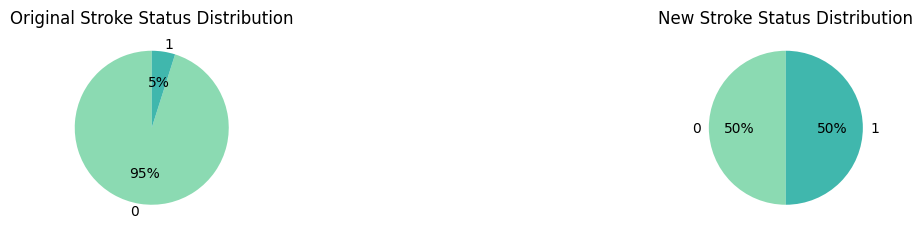

In [186]:
# Create two pie charts to show the original and the current distribution of 1s and 0s in the 'stroke' column
model_data = model_df.stroke.value_counts()
smote_data = y_train_smote.value_counts()

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,2.5))
ax1.pie(model_data.values, labels=model_data.index, colors=mako, autopct='%.0f%%', startangle=90)
ax2.pie(smote_data.values, labels=smote_data.index, colors=mako, autopct='%.0f%%', startangle=90)
ax1.set_title('Original Stroke Status Distribution')
ax2.set_title('New Stroke Status Distribution')
plt.show()  

<b>→ As can be seen in the charts above, we have succesfully balanced the 1s and 0s in our 'stroke' column, meaning we can now try to fit our resampled data to different Machine Learning models.</b>

## 5.4. Model Evaluation

In [187]:
print(modelReport(LogisticRegression(random_state=0, max_iter=1000), X_train_smote, y_train_smote, X_test, y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       962
           1       0.13      0.38      0.20        50

    accuracy                           0.85      1012
   macro avg       0.55      0.63      0.56      1012
weighted avg       0.92      0.85      0.88      1012



In [188]:
print(modelReport(KNeighborsClassifier(), X_train_smote, y_train_smote, X_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       962
           1       0.13      0.58      0.21        50

    accuracy                           0.78      1012
   macro avg       0.55      0.69      0.54      1012
weighted avg       0.93      0.78      0.84      1012



In [189]:
print(modelReport(DecisionTreeClassifier(), X_train_smote, y_train_smote, X_test, y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       962
           1       0.18      0.34      0.24        50

    accuracy                           0.89      1012
   macro avg       0.57      0.63      0.59      1012
weighted avg       0.93      0.89      0.91      1012



In [190]:
print(modelReport(RandomForestClassifier(), X_train_smote, y_train_smote, X_test, y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       962
           1       0.20      0.26      0.23        50

    accuracy                           0.91      1012
   macro avg       0.58      0.60      0.59      1012
weighted avg       0.92      0.91      0.92      1012



<b>→ From the tables above, we can see that:</b>
- 